# 0 - 1 Knapsack Problem

**Problem**:
You are given weights and values of N items, put these items in a knapsack of capacity W to get the maximum total value in the knapsack. Note that we have only one quantity of each item.
In other words, given two integer arrays val[0..N-1] and wt[0..N-1] which represent values and weights associated with N items respectively. Also given an integer W which represents knapsack capacity, find out the maximum value subset of val[] such that sum of the weights of this subset is smaller than or equal to W. You cannot break an item, either pick the complete item or dont pick it (0-1 property).

**We have to print the maximum values sum whoose weights sum is less then or equal to given capacity**

In [1]:
#  RECURSIVE APPROACH
class Solution:
    def knapSack(self, W, wt, val, n):
        # Base case: if there are no items or the knapsack capacity is 0
        if n == 0 or W == 0:
            return 0
        
        # If the weight of the current item exceeds the knapsack capacity,
        # it cannot be included in the optimal solution
        if wt[n-1] > W:
            return self.knapSack(W, wt, val, n-1)
        
        # Recursive case:
        # Return the maximum of two cases:
        # 1. Include the current item and reduce the knapsack capacity and remaining items
        # 2. Exclude the current item and consider the remaining items
        else:
            return max(
                val[n-1] + self.knapSack(W - wt[n-1], wt, val, n-1),
                self.knapSack(W, wt, val, n-1)
            )


In [2]:
# TABULAR APPROACH
# wt = [2, 1, 4, 7, 3]
# val = [1, 4, 6, 2, 3]
# W = 12

def knapsackProblem(val, wt, W):
    
    table = [[0 for _ in range(W+1)] for _ in range(n+1)]
    
    for i in range(1, n+1):
        
        for j in range(1, W+1):
            
            if j < wt[i-1]:
                table[i][j] = table[i-1][j]
            
            else:
                
                table[i][j] = max(table[i-1][j], table[i-1][j- wt[i-1]] + val[i-1])
    
    return table[-1][-1]

# Lists and arrays in python

**Lists**

- We can use "in" and "not in" keywords to check an element present in the list or not
- Lists are inbuilt data structures in python
- Can store elements of different types
- We can even nest list with other data structures like dictionaries, tuples etc

**Arrays**

- they can store elements of similar types only
- they are not inbuilt data structures in python

# Knapsack with Duplicate Items : Unbounded Knapsack (Repetition of items allowed)

**Problem**:
Given a set of N items, each with a weight and a value, represented by the array w[] and val[] respectively. Also, a knapsack with weight limit W.
The task is to fill the knapsack in such a way that we can get the maximum profit. Return the maximum profit.
Note: Each item can be taken any number of times.

In [3]:
class Solution:
    def knapSack(self, N, W, val, wt):
        # Initialize a table to store the maximum value for each weight capacity
        table = [0 for _ in range(W+1)]

        # Iterate over each weight capacity from 1 to W
        for i in range(1, W+1):
            # Iterate over each item
            for j in range(N):
                # Check if the weight of the current item is less than or equal to the current weight capacity
                if wt[j] <= i:
                    # Calculate the maximum value between excluding and including the current item
                    table[i] = max(table[i], table[i - wt[j]] + val[j])

        # Return the maximum value that can be obtained with the given weight capacity
        return table[-1]


# Egg Dropping Puzzle

**Problem**:
You are given N identical eggs and you have access to a K-floored building from 1 to K.

There exists a floor f where 0 <= f <= K such that any egg dropped at a floor higher than f will break, and any egg dropped at or below floor f will not break. There are few rules given below. 

An egg that survives a fall can be used again.
- A broken egg must be discarded.
- The effect of a fall is the same for all eggs.
- If the egg doesn't break at a certain floor, it will not break at any floor below.
- If the eggs breaks at a certain floor, it will break at any floor above.

Return the minimum number of moves that you need to determine with certainty what the value of f is.

In [4]:
# TLE code using recursion approach
class Solution:
    
    # Function to find minimum number of attempts needed
    # in order to find the critical floor.
    def eggDrop(self, n, k):
        # Call the helper function and return the result
        return self.eggDropp(n, k)
    
    def eggDropp(self, n, k):
        # Base cases
        if n == 0:
            return 0
        
        if k == 1 or k == 0:
            return k
        
        if n == 1:
            return k
        
        # Initialize the minimum number of attempts to a large value
        ans = float('inf')
        
        # Consider all possible floors
        for x in range(1, k+1):
            # Find the maximum attempts among the two cases:
            # 1. The egg breaks at floor x: Decrease the number of eggs by 1 and consider the floors below x
            # 2. The egg doesn't break at floor x: Keep the same number of eggs and consider the floors above x
            attempts = 1 + max(self.eggDropp(n-1, x-1), self.eggDropp(n, k-x))
            
            # Update the minimum number of attempts
            ans = min(ans, attempts)
        
        # Return the minimum number of attempts
        return ans


In [5]:
# Optimized approach using the combination of recursion and table
class Solution:
    def solve(self, n, k, dp):
        # Base case: If there is only one egg, return the number of floors (k)
        if n == 1:
            return k

        # Base case: If there are no floors, no attempts are needed (0)
        if k == 0:
            return 0

        # Check if the value for this state (n, k) is already computed and stored in dp
        if dp[n][k] != -1:
            return dp[n][k]

        # Initialize the answer with infinity
        ans = float('inf')

        # Iterate through each floor from 1 to k
        for i in range(1, k+1):
            # Recursive call to solve the subproblem for the case when the egg breaks at floor i-1
            broken = self.solve(n-1, i-1, dp)

            # Recursive call to solve the subproblem for the case when the egg doesn't break at floor i-1
            not_broken = self.solve(n, k-i, dp)

            # Calculate the maximum attempts required among the broken and not broken cases
            max_val = max(broken, not_broken)

            # Calculate the minimum attempts required among all the floors
            ans = min(ans, max_val + 1)

        # Store the answer for this state (n, k) in dp to avoid redundant computation
        dp[n][k] = ans

        # Return the minimum number of attempts for this state (n, k)
        return ans

    def eggDrop(self, n, k):
        # Initialize a 2D table dp with -1 values to store computed answers
        dp = [[-1 for _ in range(k+1)] for _ in range(n+1)]

        # Call the solve method to find the minimum number of attempts needed
        return self.solve(n, k, dp)


# Word Break
**Problem**
Given a string A and a dictionary of n words B, find out if A can be segmented into a space-separated sequence of dictionary words.

Note: From the dictionary B each word can be taken any number of times and in any order.

In [6]:
# TLE Recursion approach

def wordBreak(line, dictionary):
    # Convert the dictionary list to a set for efficient lookup
    dict1 = set(dictionary)
    
    # Base case: if the current line is present in the dictionary, return 1
    if line in dict1:
        return 1
    
    # Initialize the answer as 0
    ans = 0
    
    # Get the length of the current line
    n = len(line)
    
    # Iterate over all possible break points in the line
    for i in range(n):
        # Recursively check if the substring before the current break point and
        # the substring after the current break point can be broken into dictionary words
        if wordBreak(line[:i], dictionary) and wordBreak(line[i:], dictionary):
            ans = 1  # If both substrings can be broken, set the answer as 1
    
    return ans

In [7]:
# Optimized approach
def wordBreak(line, dictionary):
    # Get the length of the input line
    n = len(line)
    
    # Initialize a table to store intermediate results
    table = [0 for _ in range(n+1)]
    table[0] = 1  # Set the base case: an empty string can be segmented
    
    # Iterate over each index of the line
    for i in range(1, n+1):
        # Iterate over each index before the current index
        for j in range(i):
            # Check if the substring from j to i is in the dictionary and if table[j] is True
            if table[j] and line[j:i] in dictionary:
                table[i] = 1  # Set the current index in the table to indicate it can be segmented
    
    # Return the last value in the table, which represents whether the entire line can be segmented
    return table[-1]

# Tile Stacking Problem

**Problem**:
You are given a set of N types of rectangular 3-D boxes, where the ith box has height h, width w and length l. Your task is to create a stack of boxes which is as tall as possible, but you can only stack a box on top of another box if the dimensions of the 2-D base of the lower box are each strictly larger than those of the 2-D base of the higher box. Of course, you can rotate a box so that any side functions as its base. **It is also allowable to use multiple instances of the same type of box.** Your task is to complete the function maxHeight which returns the height of the highest possible stack so formed.
 

Note: 
Base of the lower box should be strictly larger than that of the new box we're going to place. This is in terms of both length and width, not just in terms of area. So, two boxes with same base cannot be placed one over the other.

In [8]:
class Solution:
    def maxHeight(self, height, width, length, n):
        # Initialize the dp array to store the maximum heights for each box configuration
        dp = [0 for i in range(10005)]

        # Initialize the rot list to store all possible rotations of each box
        rot = []

        # Iterate over each box
        for i in range(n):
            a = height[i]
            b = width[i]
            c = length[i]

            # Generate all possible rotations of the current box and append them to rot list
            rot.append([[a, b], c])  # original orientation
            rot.append([[b, a], c])  # rotate 90 degrees
            rot.append([[a, c], b])  # rotate 90 degrees
            rot.append([[c, a], b])  # rotate 180 degrees
            rot.append([[b, c], a])  # rotate 90 degrees
            rot.append([[c, b], a])  # rotate 180 degrees

            # Sort the rot list in non-decreasing order based on the dimensions of the base
            rot.sort()

        # Iterate over each element in the rot list
        for i in range(len(rot)):
            # Initially, dp[i] is set to the height of the current box configuration, which is rot[i][1].
            # This is because, at this point, we haven't placed any boxes on top of the current box yet.
            dp[i] = rot[i][1]

            # The inner loop iterates over the previous box configurations, represented by the variable j,
            # where j ranges from 0 to i-1.
            for j in range(i):
                # For each previous box configuration j, we check if the base dimensions of the current box configuration,
                # rot[i][0][0] (width) and rot[i][0][1] (length), are strictly greater than the base dimensions of the previous box configuration,
                # rot[j][0][0] (width) and rot[j][0][1] (length). This condition ensures that the current box can be placed on top of the previous box,
                # as mentioned in the problem statement.
                if rot[i][0][0] > rot[j][0][0] and rot[i][0][1] > rot[j][0][1]:
                    # If the condition is satisfied, we update dp[i] by taking the maximum between its current value and
                    # the sum of the height of the previous box (dp[j]) and the height of the current box (rot[i][1]).
                    # This accounts for the scenario where placing the current box on top of the previous box results in a higher stack height.
                    dp[i] = max(dp[i], dp[j] + rot[i][1])

        # Return the maximum value from the dp array, which represents the height of the highest possible stack
        return max(dp)


# Partition equal subset sum
**Problem**:
Given an array arr[] of size N, check if it can be partitioned into two parts such that the sum of elements in both parts is the same.

In [9]:
class Solution:
    def equalPartition(self, N, arr):
        # Calculate the total sum of elements in the array
        total = sum(arr)

        # If the total sum is odd, it cannot be partitioned equally, so return False
        if total % 2 == 1:
            return False

        # Sort the array in ascending order
        arr.sort()

        # Calculate the target sum for each partition
        target_sum = total // 2

        # Create a 2D dp array to store the intermediate results
        dp = [[0 for _ in range(target_sum + 1)] for _ in range(N + 1)]

        # Initialize the first column of the dp array to 1, indicating that there exists an empty subset with a sum of 0
        for i in range(N + 1):
            dp[i][0] = 1

        # Iterate over each element in the array and calculate the possible sums
        for i in range(1, N + 1):
            for j in range(1, target_sum + 1):
                # If the current element is greater than the sum required, exclude it
                if j < arr[i - 1]:
                    dp[i][j] = dp[i - 1][j]
                # Otherwise, consider both options: including or excluding the current element
                else:
                    dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - arr[i - 1]])

        # Return the value at the bottom-right corner of the dp array
        # It represents whether it is possible to partition the array into two subsets with equal sums
        return dp[-1][-1]


# Travelling Salesman Problem

**Problem**
Given a matrix cost of size n where cost[i][j] denotes the cost of moving from city i to city j. Your task is to complete a tour from the city 0 (0 based index) to all other cities such that you visit each city atmost once and then at the end come back to city 0 in min cost.

# Coin change Problem
**Problem**:
Given an integer array coins[ ] of size N representing different denominations of currency and an integer sum, find the number of ways you can make sum by using different combinations from coins[ ].  
Note: Assume that you have an infinite supply of each type of coin. And you can use any coin as many times as you want.

In [10]:
class Solution:
    def count(self, coins, N, Sum):
        # Create a 2D table to store the intermediate results
        table = [[0 for _ in range(Sum + 1)] for _ in range(N + 1)]

        # Initialize the first column of the table to 1
        # This represents the base case where the sum required is 0
        for i in range(N + 1):
            table[i][0] = 1

        # Iterate over each coin and each sum
        for i in range(1, N + 1):
            for j in range(1, Sum + 1):
                # If the sum required is less than the current coin value, exclude the coin
                if j < coins[i - 1]:
                    table[i][j] = table[i - 1][j]
                # Otherwise, consider both options: including and excluding the current coin
                else:
                    # Add the number of ways without including the current coin (from the previous row)
                    # with the number of ways by including the current coin (from the current row)
                    table[i][j] = table[i - 1][j] + table[i][j - coins[i - 1]]

        # Return the value at the bottom-right corner of the table, which represents
        # the number of ways to make the desired sum using the given coins
        return table[-1][-1]  # Represents the number of ways to make the desired sum using the given coins


# nCr
**Problem**:
Given two integers n and r, find nCr. Since the answer may be very large, calculate the answer modulo 109+7.

In [11]:
class Solution:
    def nCr(self, n, r):
        # code here
        MOD = 10**9 + 7  # Define the modulo value as 10^9+7
        
        # If r is greater than n, nCr is not defined, so return 0
        if r > n:
            return 0
        
        # If r is 0 or n is equal to r, nCr is 1
        elif r == 0 or n == r:
            return 1
        
        # Calculate the value of x as min(r, n-r)
        x = min(r, n-r)
        
        # Create two arrays dp1 and dp2 of size (x+1) to store the intermediate results
        dp1 = [0 for _ in range(x+1)]
        dp2 = [0 for _ in range(x+1)]
        
        # Initialize the first two elements of dp1 and dp2 to 1
        dp1[0] = 1
        dp1[1] = 1
        dp2[0] = 1
        dp2[1] = 1
        
        # Iterate from 1 to n-1
        for i in range(1, n):
            # Iterate from 1 to x
            for j in range(1, x+1):
                # Calculate the sum of two previous values from dp1 and store it in dp2
                dp2[j] = (dp1[j-1] + dp1[j]) % MOD
                
            # Copy the values from dp2 to dp1
            dp1[:] = dp2[:]
        
        # Return the value at the last index of dp2 modulo MOD
        return dp2[-1] % MOD


# Calculate the coefficient
**Problem**:
Given two integers n and k, The task is to calculate Permutation Coefficient P(n,k)
Note: P(n, k) is used to represent the number of ways to obtain an ordered subset having k elements from a set of n elements.Since this value may be large only find it modulo 10^9 + 7.

In [12]:
# TLE approach

class Solution:
    def permutationCoeff(self,n, k):
        # Code here

        if k > n :
            return 0

        MOD = 10**9 + 7

        x = self.factorial(n) 
        y = self.factorial(n-k)  

        ans = x//y

        return ans%MOD


    def factorial(self, n):

        if n == 1 :
            return 1

        elif n == 0 :
            return 1

        return n*self.factorial(n-1)

In [13]:
# Optimized approach
class Solution:
    def permutationCoeff(self, n, k):
        # Code here
        
        if k > n:
            return 0
        
        MOD = 10**9 + 7
        
        # Calculate P(n, k) as P(n, n-k)
        k = n - k
        
        ans = 1
        
        # Calculate the factorial of n and store it in ans
        while n > k:
            ans = (ans * n)
            n -= 1
        
        return ans % MOD

# --------------------Counters in Python------------------

# All unique permutations of a array
Given an array arr[] of length n. Find all possible unique permutations of the array.


Input: 
n = 3
arr[] = {1, 2, 1}

Output: 
1 1 2
1 2 1
2 1 1

In [14]:
from collections import Counter

class Solution:
    def uniquePerms(self, arr, n):
        # Code here 
        permutations = []
        
        # Count the frequency of each element using Counter
        counter = Counter(arr)
        
        # Call the backtrack function to generate unique permutations
        self.backtrack(counter, [], permutations, n)
        
        return permutations
        
    def backtrack(self, counter, current, permutations, n):
        # Base case: If the length of the current permutation is equal to the total length of the array
        if len(current) == n:
            permutations.append(current[:])  # Store permutations as copies to avoid reference issues
            return
        
        # Iterate over each unique element in the counter
        for num in counter:
            if counter[num] > 0:
                current.append(num)  # Add the element to the current permutation
                counter[num] -= 1  # Decrement the count of the element
                
                # Recursive call to generate permutations
                self.backtrack(counter, current, permutations, n)
                
                # Undo the choice by incrementing the count and removing the element from the current permutation
                counter[num] += 1
                current.pop()


# -------------Counters finished---------

# Nth ctalan number
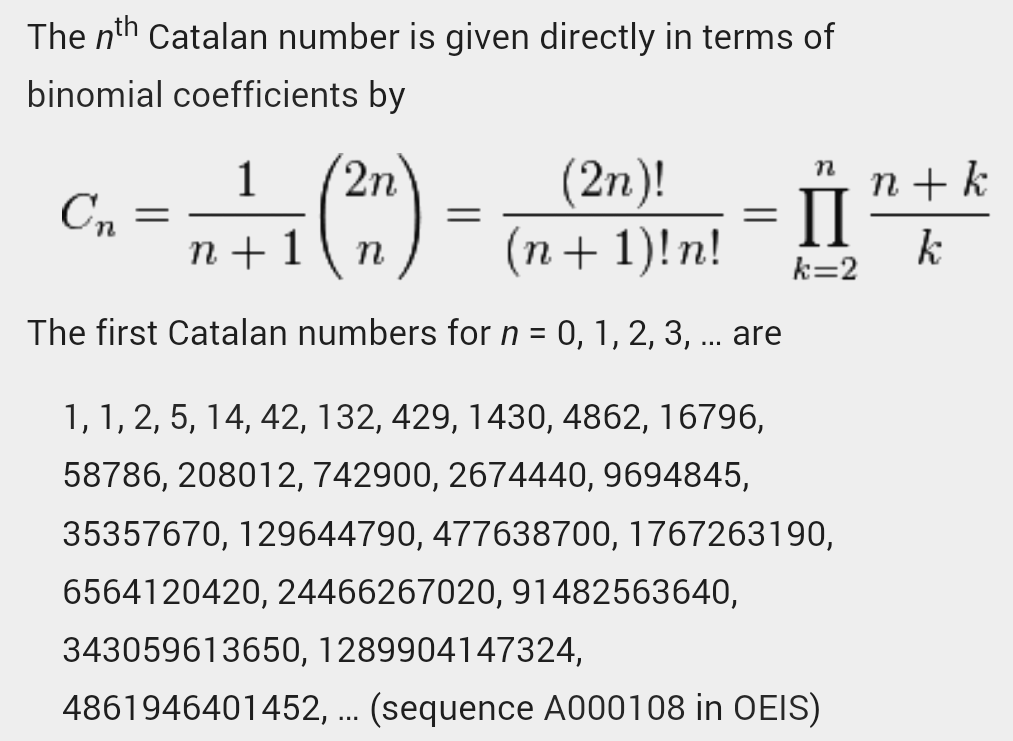

**Problem**:
Given a number N. The task is to find the Nth catalan number.
The first few Catalan numbers for N = 0, 1, 2, 3, … are 1, 1, 2, 5, 14, 42, 132, 429, 1430, 4862, …

Catalan Number for N is equal to the number of expressions containing N pairs of paranthesis that are correct matched, i.e., for each of the N '(' there exist N ')' on there right and vice versa.

Note: Positions start from 0 as shown above.

In [15]:
class Solution:
    #Function to find the nth catalan number.
    def findCatalan(self,n):
        #return the nth Catalan number.
        if n == 1 or n ==0 :
            return 1
        if n == 2 :
            return 2
            
        number = 1
        k = 2
        while k <= n :
            number = (number*(n+k))
            k += 1
        
        k = 2
        
        while k <= n :
            number = number//k
            k += 1
        
        return int(number)

# Matrix Chain Multiplication
**Problem**: 
Given a sequence of matrices, find the most efficient way to multiply these matrices together. The efficient way is the one that involves the least number of multiplications.

The dimensions of the matrices are given in an array arr[] of size N (such that N = number of matrices + 1) where the ith matrix has the dimensions (arr[i-1] x arr[i]).

Example 1:

Input: N = 5
    
arr = {40, 20, 30, 10, 30}

Output: 26000
    
Explaination: There are 4 matrices of dimension 
40x20, 20x30, 30x10, 10x30. Say the matrices are  named as A, B, C, D. Out of all possible combinations, 
the most efficient way is (A*(B*C))*D. 

The number of operations are -
20*30*10 + 40*20*10 + 40*10*30 = 26000.

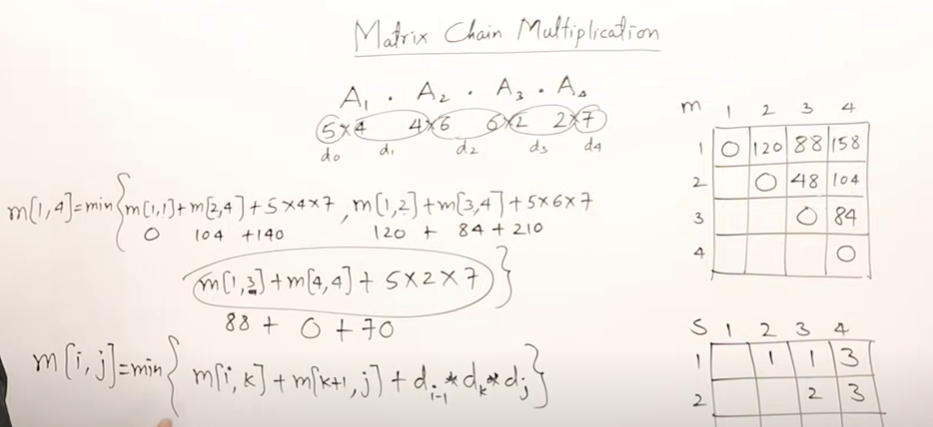

In [16]:
class Solution:
    def matrixMultiplication(self, N, arr):
        # code here

        maxint = (10 ** 9) + 7
        
        # Create a 2D table to store the minimum number of multiplications
        # Initialize all elements to 0
        table = [[0 for _ in range(N)] for _ in range(N)]

        # Initialize diagonal elements to 0 (multiplying a matrix with itself requires 0 multiplications)
        for i in range(N):
            table[i][i] = 0

        # Iterate over different chain lengths (L),chain legths refers number of matrices being multiplied
        for L in range(2, N):
            # Iterate over starting index (i)
            for i in range(1, N - L + 1):
                # Calculate the ending index (j) based on chain length (L) and starting index (i)
                j = i + L - 1
                
                # Initialize table[i][j] to a large value (representing infinity)
                table[i][j] = maxint
                
                # Iterate over the partition point (k)
                for k in range(i, j):
                    # Calculate the number of multiplications required for the two sub-chains
                    # and the resulting matrices
                    Q = table[i][k] + table[k + 1][j] + arr[i - 1] * arr[k] * arr[j]
                    
                    # Update table[i][j] with the minimum number of multiplications
                    table[i][j] = min(Q, table[i][j])
        
        # Return the minimum number of multiplications required to multiply all matrices
        return table[1][N - 1]  # Represents the optimal solution for the chain length L


# Longest Common Subsequence
**Problem**:
Given two strings, find the length of longest subsequence present in both of them. Both the strings are in uppercase latin alphabets.

Example 1:

Input:
A = 6, B = 6
str1 = ABCDGH,
str2 = AEDFHR

Output: 3
Explanation: LCS for input strings “ABCDGH” and “AEDFHR” is “ADH” of length 3.

In [17]:
class Solution:
    
    # Function to find the length of the longest common subsequence in two strings.
    def lcs(self, x, y, s1, s2):
        
        # Create a table to store the lengths of the longest common subsequences
        # Initialize all elements to 0
        table = [[0 for _ in range(x + 1)] for _ in range(y + 1)]
        
        # Iterate over the characters of the second string (s2)
        for i in range(1, y + 1):
            
            # Iterate over the characters of the first string (s1)
            for j in range(1, x + 1):
                
                # If the characters at the current positions are not equal
                if s1[j - 1] != s2[i - 1]:
                    
                    # Set the value in the table to the maximum of the lengths
                    # of the previous subsequences
                    table[i][j] = max(table[i - 1][j], table[i][j - 1])
                    
                else:
                    # If the characters at the current positions are equal,
                    # increment the length of the common subsequence
                    
                    #table[i-1][j-1] stores the legth of the LCS till now
                    table[i][j] = table[i - 1][j - 1] + 1
        
        # Return the length of the longest common subsequence
        return table[-1][-1]

# LCS of three strings
Given 3 strings A, B and C, the task is to find the longest common sub-sequence in all three given sequences.

Example 1:

Input:
A = "geeks", B = "geeksfor", 
C = "geeksforgeeks"
Output: 5
Explanation: "geeks"is the longest common
subsequence with length 5.

In [18]:
class Solution:
    def LCSof3(self, A, B, C, n1, n2, n3):
        # Create a 3D table to store the lengths of LCS of the three strings A, B, and C.
        # The table has dimensions (n3+1) x (n2+1) x (n1+1).
        # table[i][j][k] will store the length of LCS of substrings C[:i], B[:j], and A[:k].
        table = [[[0 for _ in range(n1+1)] for _ in range(n2+1)] for _ in range(n3+1)]
        
        # Traverse each element of string C, each element of string B, and each element of string A.
        for i in range(1, n3 + 1):
            for j in range(1, n2 + 1):
                for k in range(1, n1 + 1):
                    
                    
                    # Check if the current element of string C, B, and A are equal.
                    if C[i-1] == B[j-1] and B[j-1] == A[k-1]:
                        # If the current elements are equal, we can extend the LCS length by 1.
                        # So, we set table[i][j][k] to 1 + table[i-1][j-1][k-1], which represents
                        # the LCS length of the substrings C[:i], B[:j], and A[:k] with the current
                        # elements excluded from each of the three strings.
                        table[i][j][k] = 1 + table[i-1][j-1][k-1]
                        
                    else:
                        # If the current elements are not equal, we cannot extend the LCS length.
                        # So, we take the maximum of the LCS lengths from three different possibilities:
                        # 1. Excluding the current element from string C and considering the LCS of C[:i-1], B[:j], and A[:k].
                        # 2. Excluding the current element from string B and considering the LCS of C[:i], B[:j-1], and A[:k].
                        # 3. Excluding the current element from string A and considering the LCS of C[:i], B[:j], and A[:k-1].
                        table[i][j][k] = max(table[i-1][j][k], table[i][j-1][k], table[i][j][k-1])
                        
        # The final result will be the LCS length of the entire strings C, B, and A,
        # which is stored at the bottom-right corner of the table.
        return table[-1][-1][-1]


# Longest Palindromic Subsequence
**Problem**:
Given a String, find the longest palindromic subsequence.

Example 1:

Input:
S = "bbabcbcab"

Output: 7
    
Explanation: Subsequence "babcbab" is the
longest subsequence which is also a palindrome.

In [19]:
class Solution:
    def longestPalinSubseq(self, S):
        # Get the length of the input string
        n = len(S)
        
        # Create a reversed version of the input string
        s1 = ''
        for i in range(n):
            s1 += S[n-i-1]
        
        # Create a table to store the lengths of palindromic subsequences
        table = [[0 for _ in range(n+1)] for _ in range(n+1)]
        
        # Iterate through the input string and its reversed version
        for i in range(1, n+1):
            for j in range(1, n+1):
                # If the characters at the corresponding positions are different
                if S[i-1] != s1[j-1]:
                    # Choose the maximum length of palindromic subsequence so far
                    table[i][j] = max(table[i][j-1], table[i-1][j])
                else:
                    # If the characters match, add 1 to the length of the previous palindromic subsequence
                    table[i][j] = table[i-1][j-1] + 1
                
        # The last element in the table will hold the length of the longest palindromic subsequence
        return table[-1][-1]


# Longest increasing(strictly) subsequence in an array
**Problem**:
Given an array of integers, find the length of the longest (strictly) increasing subsequence from the given array.

In [20]:
class Solution:
    def longestSubsequence(self, a, n):
        # Initialize an array dp of size n, where dp[i] will store the length of the longest increasing subsequence
        dp = [1 for _ in range(n)]
        
        # Iterate from the second last element of the array backwards to the first element
        for i in range(n-2, -1, -1):
            # Iterate from the next element after i to the last element of the array
            for j in range(i+1, n):
                # Check if the current element a[i] is less than a[j]
                if a[i] < a[j]:
                    # Update dp[i] with the maximum of its current value, 1, and dp[j]+1
                    dp[i] = max(1, dp[i], dp[j]+1)
        
        # Find the maximum value in the dp array, which represents the length of the longest increasing subsequence
        ans = -99999
        for item in dp:
            ans = max(ans, item)
        
        # Return the length of the longest increasing subsequence
        return ans


# Longest Common Increasing Subsequence
**Problem**:
Given two arrays, arr1[] and arr2[] of sizes M and N respectively, find the length of the longest common increasing subsequence(LCIS). 

Example 1:

Input:

N = 4

Arr1[] = {3, 4, 9, 1}

M = 7

Arr2[] = {5, 3, 8, 9, 10, 2, 1}

Output: 2
Explanation: The longest increasing subsequence
that is common is {3, 9} and its length is 2.

In [21]:
class Solution:
    def LCIS(self, arr1, n, arr2, m):
        # Returns the length and the LCIS of two arrays arr1[0..n-1] and arr2[0..m-1]
        # table[j] is going to store the length of LCIS ending with arr2[j]. We initialize it as 0.
        table = [0] * m
        
        # Initialize the table with zeros
        for j in range(m):
            table[j] = 0
        
        # Traverse all elements of arr1[]
        for i in range(n):
            
            # Initialize the current length of LCIS for the current element of arr1
            current = 0
            
            # For each element of arr1[], traverse all elements of arr2[]
            for j in range(m):
                
                # If both arrays have the same elements
                # Note that we don't break the loop here
                if arr1[i] == arr2[j]:
                    # Update the value in table at index j with the maximum of its current value and current + 1
                    table[j] = max(table[j], current + 1)
                    #table[j] stores the legth of possible increasing subsequences till j items and i items in arr2, arr1 respectively
                
                # Now seek for the previous smaller common element for the current element of arr1
                if arr1[i] > arr2[j] and table[j] > current:
                    # Update the current length with the value in table at index j, 
                    current = table[j]
                    
        # Find the maximum value in table[], which represents the length of the LCIS
        result = 0
        for i in range(m):
            if table[i] > result:
                result = table[i]
                
        return result


# Find all distinct subset (or subsequence) sums
**Problem**:
Given a set of integers, find all distinct sums that can be generated from the subsets of the given sets.
 

Example 1:

Input: nums = {1,2}
Output: {0,1,2,3}
    
Explanation: Four distinct sums can be
calculated which are 0, 1, 2 and 3.
0 if we do not choose any number.
1 if we choose only 1.
2 if we choose only 2.
3 if we choose 1 and 2.

In [22]:
class Solution:
    def DistinctSum(self, nums):
        # Calculate the total sum of all elements in the array
        total_sum = sum(nums)
        # Get the length of the array
        n = len(nums)
        
        # Create a 2D array to store the DP results
        dp = [[0]*(total_sum+1) for _ in range(n)]
        
        # Base case: If the first element is less than or equal to the total sum, mark it as True
        if nums[0] <= total_sum:
            dp[0][nums[0]] = True
        
        # Base case: Mark all elements in the first column as True (sum of 0 can be obtained)
        for i in range(n):
            dp[i][0] = True
       
        # Dynamic Programming loop to fill the DP table
        for i in range(1, n):
            for j in range(total_sum+1):
                # If we don't take the current element, the result is same as the previous row
                non_take = dp[i-1][j]
                
                # If the current element is less than or equal to the total sum
                if nums[i] <= total_sum:
                    # If we take the current element, check if the remaining sum can be obtained from the previous row
                    take = dp[i-1][j-nums[i]]
                
                # Update the DP table with the maximum value between take and non_take
                dp[i][j] = take or non_take
               
        # Traverse the last row of the DP table to find the indices with True values
        result = []
        for index, s in enumerate(dp[n-1]):
            if s:
                result.append(index)
        
        # Return the list of distinct sums
        return result


# Wildcard pattern matching
**Problem**:
Given two strings 'str' and a wildcard pattern 'pattern' of length N and M respectively,  You have to print '1' if the wildcard pattern is matched with str else print '0' .

The wildcard pattern can include the characters ‘?’ and ‘*’
‘?’ – matches any single character
‘*’ – Matches any sequence of characters (including the empty sequence)

Note: The matching should cover the entire str (not partial str).

In [23]:
class Solution:
    def wildCard(self, pattern, string):
        N = len(string)
        M = len(pattern)

        # Initialize the dp table
        dp = [[False] * (M + 1) for _ in range(N + 1)]

        # Empty pattern matches empty string
        dp[0][0] = True  # Case when both pattern and string are empty

        # Handle the case when pattern is empty
        for j in range(1, M + 1):
            if pattern[j - 1] == '*':
                dp[0][j] = dp[0][j - 1]  # '*' can match an empty sequence

        # Fill the dp table
        for i in range(1, N + 1):
            for j in range(1, M + 1):
                if pattern[j - 1] == '?' or pattern[j - 1] == string[i - 1]:
                    dp[i][j] = dp[i - 1][j - 1]  # Match status without considering '?' or matching characters
                elif pattern[j - 1] == '*':
                    dp[i][j] = dp[i][j - 1] or dp[i - 1][j]  # Match status considering '*' as empty or matching the current character

        # Return the result
        return int(dp[N][M])  # Convert the match status to integer

# Form a palindrome
**Problem**:
Given a string, find the minimum number of characters to be inserted to convert it to palindrome.

For Example:

ab: Number of insertions required is 1. bab or aba

aa: Number of insertions required is 0. aa

abcd: Number of insertions required is 3. dcbabcd

In [24]:
class Solution:
    def findMinInsertions(self, S):
        s1 = ''
        n = len(S)

        # Create a reversed version of the input string
        for i in range(len(S)):
            s1 += S[n-i-1]

        # Initialize the DP table
        table = [[0 for _ in range(n+1)] for _ in range(n+1)]

        # The approach is to find the longest common subsequence between S and its reversed version s1
        # If S could have been a palindrome, the length of the common subsequence between s1 and S would be n
        # So, table[-1][-1] represents the length of the longest common subsequence, indicating how many characters are needed to form a palindrome

        # Fill the DP table
        for i in range(1, n+1):
            for j in range(1, n+1):
                if s1[i-1] == S[j-1]:
                    table[i][j] = 1 + table[i-1][j-1]  # If the characters match, increment the length of the common subsequence
                else:
                    table[i][j] = max(table[i-1][j], table[i][j-1])  # If the characters don't match, take the maximum length from the previous cells

        # Return the number of characters needed to form the input string into a palindrome
        return (n - table[-1][-1])


# The Painter's Partition Problem-II
**Problem**:
Dilpreet wants to paint his dog's home that has n boards with different lengths. The length of ith board is given by arr[i] where arr[] is an array of n integers. He hired k painters for this work and each painter takes 1 unit time to paint 1 unit of the board. 

The problem is to find the minimum time to get this job done if all painters start together with the constraint that any painter will only paint continuous boards, say boards numbered {2,3,4} or only board {1} or nothing but not boards {2,4,5}.


Example 1:

Input:
n = 5
k = 3
arr[] = {5,10,30,20,15}
Output: 35
Explanation: The most optimal way will be:
Painter 1 allocation : {5,10}
Painter 2 allocation : {30}
Painter 3 allocation : {20,15}
Job will be done when all painters finish
i.e. at time = max(5+10, 30, 20+15) = 35

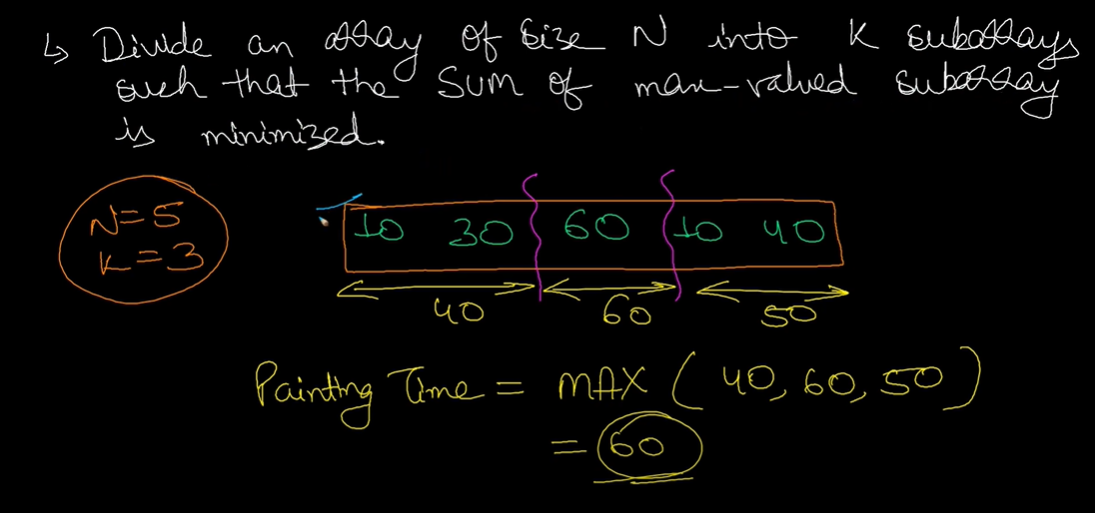

# Edit Distance
**Problem**:
Given two strings s and t. Return the minimum number of operations required to convert s to t.
The possible operations are permitted:

Insert a character at any position of the string.
Remove any character from the string.
Replace any character from the string with any other character.
 

Example 1:

Input: 
s = "geek", t = "gesek"
Output: 1
Explanation: One operation is required 
inserting 's' between two 'e's of s.

In [25]:
class Solution:
    def editDistance(self, s, t):
        # Code here

        n = len(s)
        m = len(t)

        table = [[0 for _ in range(m+1)] for _ in range(n+1)]


        for i in range(m+1):
            table[0][i] = i

        for j in range(n+1):
            table[j][0] = j

        for i in range(1, n+1):
            for j in range(1, m+1):

                if s[i-1] == t[j-1]:

                    table[i][j] = table[i-1][j-1]

                else:
                    # table[i-1][j] considered i'm inserting a new element t[j-1]
                    # table[i-1][j-1] considered if i'm replacing the element s[i-1]
                    # table[i-1][j] considered if i'm removing an element t[i-1]
                    table[i][j] = 1 + min(table[i-1][j], table[i-1][j-1], table[i][j-1])


        return table[-1][-1]

# Friends Pairing Problem

Given N friends, each one can remain single or can be paired up with some other friend. Each friend can be paired only once. Find out the total number of ways in which friends can remain single or can be paired up.
Note: Since answer can be very large, return your answer mod 10^9+7.

In [26]:
#User function Template for python3

class Solution:
    def countFriendsPairings(self, n):
        # code here 
        MOD = 10** 9 + 7 
        ans = 0
        ans = self.countpairs(n, ans)
        
        return ans%MOD
    
    
    def countpairs(self, n, ans):
        MOD = 10** 9 + 7
        if n <= 2:
            return n
    
        dp = [0] * (n + 1)
        dp[1] = 1
        dp[2] = 2
    
        for i in range(3, n + 1):
            # There are two choices for each friend:
            # 1. Remain single: dp[i-1]
            # 2. Pair up with any of the (i-1) friends: (i-1) * dp[i-2]
            dp[i] = (dp[i - 1] + (i - 1) * dp[i - 2]) % MOD
    
        return dp[n]

# Gold Mine Problem

Given a gold mine called M of (n x m) dimensions. Each field in this mine contains a positive integer which is the amount of gold in tons. Initially the miner can start from any row in the first column. From a given cell, the miner can move

to the cell diagonally up towards the right 
to the right
to the cell diagonally down towards the right
Find out maximum amount of gold which he can collect.



In [27]:
class Solution:
    def maxGold(self, n, m, M):
        # The function maxGold takes three parameters: n (number of rows in the mine), m (number of columns in the mine),
        # and M (a 2D list representing the mine and its gold values at each cell).

        # We will use a dynamic programming approach to solve the gold mine problem.

        # Starting from the second-last column (m-2) and moving leftwards, we will calculate the maximum gold that can be
        # collected at each cell by considering three possible moves (down, up, or staying in the same row) and adding
        # the maximum value from the next column (i+1).
        # The result of this dynamic programming approach will be stored in the same 2D array M.

        for i in range(m-2, -1, -1):  # Loop from the second-last column to the first column.
            for j in range(n-1, -1, -1):  # Loop from the bottom row to the top row.

                # If we are in the last column, we can only move down or stay in the same row.
                if j == n-1:
                    M[j][i] = M[j][i] + max(M[j][i+1], M[j-1][i+1])

                # If we are in the first column, we can only move up or stay in the same row.
                elif j == 0:
                    M[j][i] = M[j][i] + max(M[j+1][i+1], M[j][i+1])

                # For other columns, we can move down, up, or stay in the same row.
                else:
                    M[j][i] = M[j][i] + max(M[j+1][i+1], M[j][i+1], M[j-1][i+1])

        # After calculating the maximum gold value for each cell, we need to find the maximum value in the first column
        # (starting position) because that will give us the maximum gold that can be collected from the mine.
        ans = 0
        for i in range(n):
            ans = max(ans, M[i][0])

        # Return the maximum gold value.
        return ans


# Friends Pairing Problem


Given N friends, each one can remain single or can be paired up with some other friend. Each friend can be paired only once. Find out the total number of ways in which friends can remain single or can be paired up.
Note: Since answer can be very large, return your answer mod 10^9+7.



In [28]:
class Solution:
    def countFriendsPairings(self, n):
        # The function countFriendsPairings takes one parameter: n (the number of friends).

        # We will use a dynamic programming approach to solve the friends pairing problem.

        MOD = 10**9 + 7
        ans = 0
        
        # Call the countpairs function to calculate the number of ways to pair up friends.
        ans = self.countpairs(n, ans)
        
        # Return the answer modulo 10^9 + 7 to keep the result within a reasonable range.
        return ans % MOD

    def countpairs(self, n, ans):
        MOD = 10**9 + 7

        # Base case: If there are 0 or 1 friend, there's only one way (not pairing up) or no way to pair them.
        if n <= 2:
            return n

        # Create a dynamic programming array dp to store the count of ways to pair up i friends.
        dp = [0] * (n + 1)
        dp[1] = 1  # There's only one way for one friend (remaining single).
        dp[2] = 2  # There are two ways for two friends (either pair them or keep them single).

        # Loop from 3 to n to calculate the number of ways to pair up i friends.
        for i in range(3, n + 1):
            # To calculate dp[i], we have two choices for each friend:
            # 1. Remain single: dp[i-1]
            # 2. Pair up with any of the (i-1) friends: (i-1) * dp[i-2]
            # The (i-1) factor is because there are (i-1) friends to choose from for the last friend to pair up with.
            # We add the two choices to get the total number of ways to pair up i friends.
            dp[i] = (dp[i - 1] + (i - 1) * dp[i - 2]) % MOD

        # The final value of dp[n] will be the answer representing the number of ways to pair up n friends.
        return dp[n]


# Assembly Line Scheduling

A car factory has two assembly lines, and also given an  2D array a[2][] of size N which represent the time taken by each station. Each station is dedicated to some sort of work like engine fitting, body fitting, painting, and so on. So, a car chassis must pass through each of the n stations in order before exiting the factory. The two parallel assemble line perform same task.
From any line one can switch another line diagonally. A 2D array T[2][] of size N is also given, which represent  exit time to switch line 1 to line 2 diagonally.
Also each assembly line takes an entry time ei and exit time xi which may be different for the two lines.

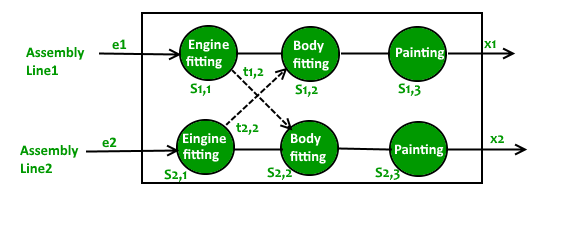

The task is to computing the minimum time it will take to build a car chassis.
One can minimize the total time taken by performing following steps:

A car chassis must pass through all stations from 1 to N in order(in any of the two assembly lines). i.e. it cannot jump from station i to station j if they are not at one move distance.
The car chassis can move one station forward in the same line, or one station diagonally in the other line. It incurs an extra cost Ti,j to move to station j from line i. No cost is incurred for movement in same line.
The time taken in station j on line i is ai, j.

In [29]:
from typing import List

class Solution:
    def carAssembly(self, n : int, a : List[List[int]], T : List[List[int]], e : List[int], x : List[int]) -> int:
        # code here
        
        # Set the number of stations (N) equal to the given value of n
        N = n
        
        # Add entry time (e) to the first station of both assembly lines
        a[0][0] += e[0]
        a[1][0] += e[1]
        
        # Add exit time (x) to the last station of both assembly lines
        a[0][-1] += x[0]
        a[1][-1] += x[1]
        
        # Initialize variables to store the final time required for each assembly line
        ans1 = a[0][N-1]
        ans2 = a[1][N-1]
        
        # Dynamic programming approach to optimize assembly time
        
        # Iterate through the stations in reverse order (from the second-to-last station to the first)
        for i in range(n-2, -1, -1):
            # Calculate the minimum time to reach the current station from the next station on the same line
            a[0][i] = min(a[0][i] + a[0][i+1], a[0][i] + T[0][i+1] + a[1][i+1])
            
            # Calculate the minimum time to reach the current station from the next station on the other line
            a[1][i] = min(a[1][i] + a[1][i+1], a[1][i] + T[1][i+1] + a[0][i+1])
        
        # The final answer is the minimum time required to complete both assembly lines
        # It is the minimum of the time required to reach the first station on each line
        return min(a[0][0], a[1][0])


# Painting the Fence
Given a fence with n posts and k colors, find out the number of ways of painting the fence so that not more than two consecutive posts have the same colors. Since the answer can be large return it modulo 10^9 + 7.

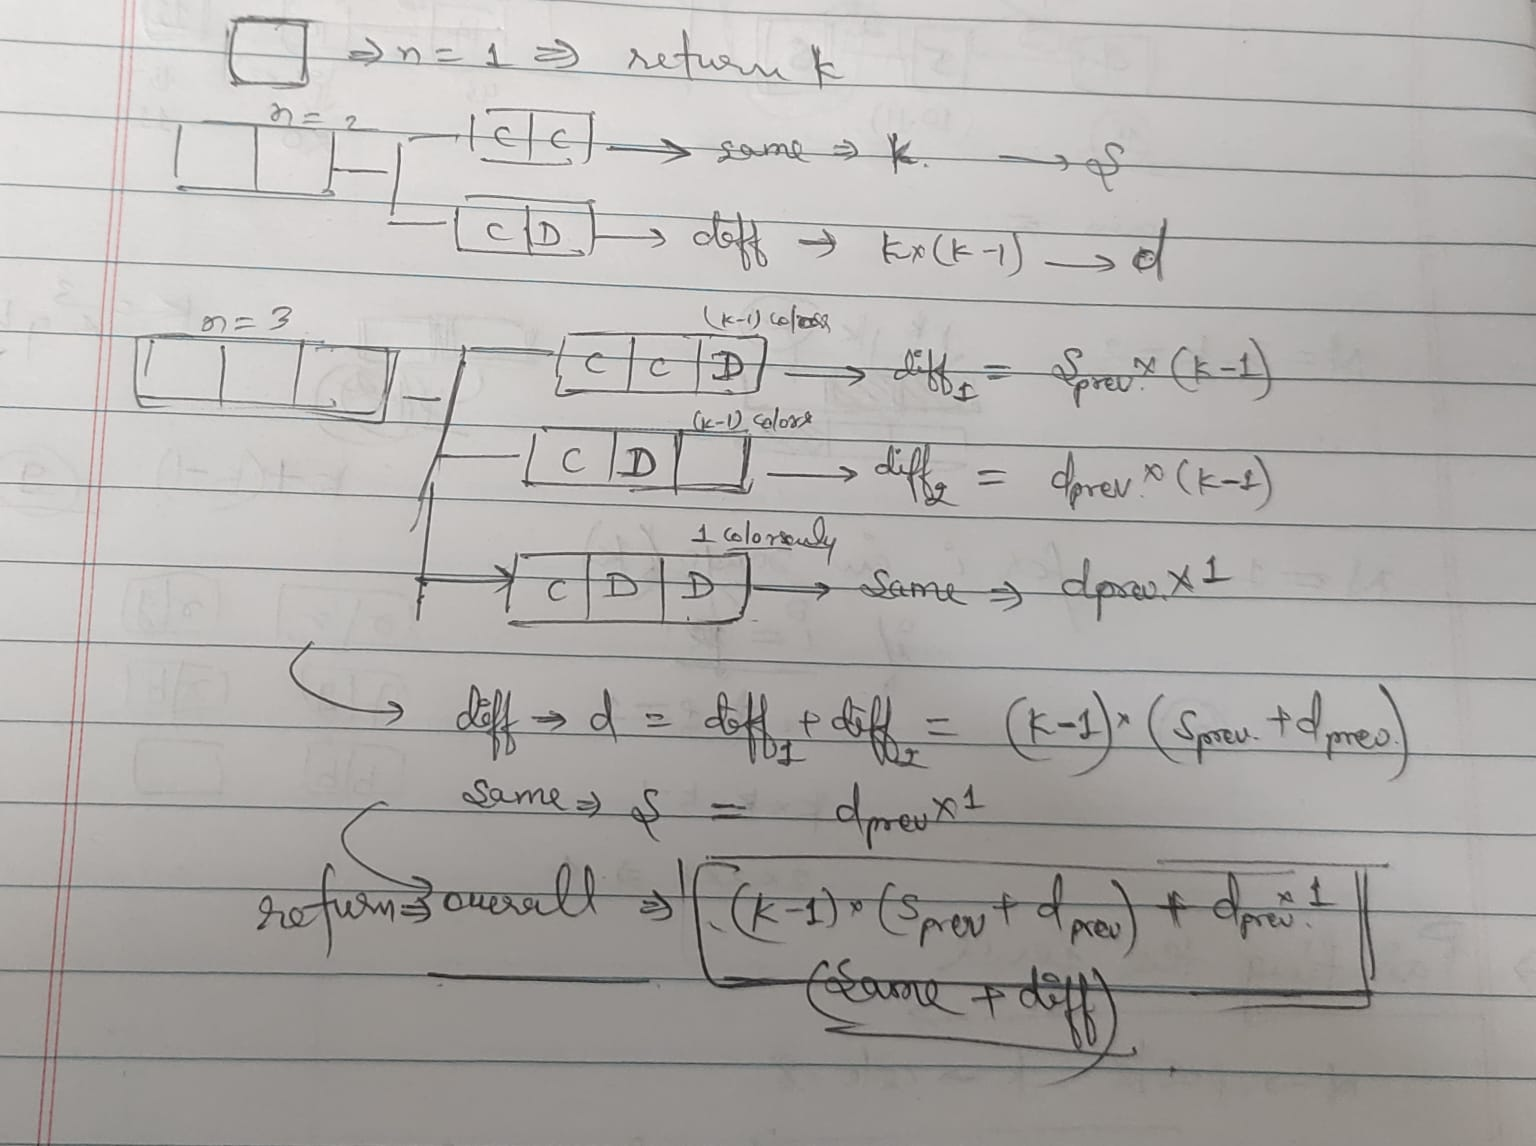

In [30]:
class Solution:
    def countWays(self, n, k):
        #code here.
        
        # Set the MOD value to 10^9 + 7 for handling large numbers
        MOD = 10**9 + 7
        
        # Base case: If there's only one fence, there are k ways to paint it (one color for each fence).
        if n == 1:
            return k
        
        # Initialize variables to store the number of ways to paint the current fence and the previous fence with the same color and different colors, respectively.
        same = k % MOD
        diff = k * (k - 1) % MOD
        
        # Dynamic programming approach to find the number of ways to paint each subsequent fence.
        for i in range(3, n + 1):
            # Calculate the number of ways to paint the current fence with a different color from the previous fence.
            # It can be obtained by choosing any of the (k-1) available colors for the current fence and having the previous fence painted with any color (same or different).
            prev_diff = diff
            diff = (k - 1) * (same + diff) % MOD
            
            # Update the number of ways to paint the current fence with the same color as the previous fence.
            # It will be the same as the previous fence painted with a different color (prev_diff) since there can't be more than two adjacent fences with the same color.
            same = prev_diff % MOD
        
        # The final answer is the sum of the number of ways to paint the last fence with the same color and different colors.
        return (same + diff) % MOD


# Maximize cut problem

Given an integer N denoting the Length of a line segment. You need to cut the line segment in such a way that the cut length of a line segment each time is either x , y or z. Here x, y, and z are integers.
After performing all the cut operations, your total number of cut segments must be maximum.

Note: if no segment can be cut then return 0.

In [31]:
# Recursive Approach
class Solution:
    # Function to find the maximum number of cuts.
    def maximizeTheCuts(self, n, x, y, z):
        # Call the recursive function Recursionsol to find the maximum number of cuts and return the result.
        # Take the maximum of the result and 0 to handle cases where the result is negative (no valid cuts can be made).
        return max(0, self.Recursionsol(n, x, y, z))
        
    
    def Recursionsol(self, N, x, y, z):
        # Base case: If the rod length is zero, no cuts can be made, so return 0.
        if N == 0:
            return 0
        
        # Base case: If the rod length is negative, it is not a valid cut, so return a very small value.
        if N < 0:
            return -float('inf')
            
        # Calculate the maximum cuts by recursively considering all three cut lengths (x, y, z).
        a = self.Recursionsol(N - x, x, y, z)
        b = self.Recursionsol(N - y, x, y, z)
        c = self.Recursionsol(N - z, x, y, z)
        
        # Return the maximum cuts for the current rod length by taking the maximum of all three possibilities and adding 1 (indicating a cut is made).
        return max(a, b, c) + 1


# Dynamic programming approach
class Solution:
    # Function to find the maximum number of cuts.
    def maximizeTheCuts(self, n, x, y, z):
        # Base case: If the rod length is zero, no cuts can be made, so return 0.
        if n == 0:
            return 0
        
        # Create a dynamic programming array to store the results of subproblems.
        dp = [ -1 for _ in range(n + 1)]
        
        # Base case: If the rod length is 0, no cuts are needed, so set dp[0] to 0.
        dp[0] = 0
        
        # Loop through rod lengths from 1 to n (inclusive).
        for i in range(1, n + 1):
            
            # Check for possible cuts using the cut length 'x'.
            if i - x >= 0 and dp[i - x] != -1:
                # Update dp[i] by taking the maximum of its current value and dp[i - x] + 1.
                # The +1 indicates that a cut of length 'x' is made at this point.
                dp[i] = max(dp[i], dp[i - x] + 1)
            
            # Check for possible cuts using the cut length 'y'.
            if i - y >= 0 and dp[i - y] != -1:
                # Update dp[i] by taking the maximum of its current value and dp[i - y] + 1.
                # The +1 indicates that a cut of length 'y' is made at this point.
                dp[i] = max(dp[i], dp[i - y] + 1)
            
            # Check for possible cuts using the cut length 'z'.
            if i - z >= 0 and dp[i - z] != -1:
                # Update dp[i] by taking the maximum of its current value and dp[i - z] + 1.
                # The +1 indicates that a cut of length 'z' is made at this point.
                dp[i] = max(dp[i], dp[i - z] + 1)
        
        # The final result will be stored in dp[n], which represents the maximum number of cuts that can be made on the rod of length 'n'.
        # If the result is negative (no valid cuts can be made), return 0.
        return max(0, dp[n])

# Longest repeating subsequencde 

Given string str, find the length of the longest repeating subsequence such that it can be found twice in the given string.

The two identified subsequences A and B can use the same ith character from string str if and only if that ith character has different indices in A and B. For example, A = "xax" and B = "xax" then the index of first "x" must be different in the original string for A and B.

In [32]:
class Solution:
    def LongestRepeatingSubsequence(self, str):
        # Get the length of the input string.
        n = len(str)
        
        # Create a 2D table to store the results of subproblems.
        # The table will have dimensions (n+1) x (n+1).
        # table[i][j] represents the length of the longest repeating subsequence
        # for the substrings str[:i] and str[:j].
        table = [[0 for _ in range(n+1)] for _ in range(n+1)]
        
        # Iterate through each character of the string.
        for i in range(1, n+1):
            for j in range(1, n+1):
                
                # If the characters at positions i and j are the same, and i is not equal to j,
                # it means we have found a common element in two different positions,
                # and we can extend the longest repeating subsequence length.
                if str[i-1] == str[j-1] and i != j:
                    table[i][j] = table[i-1][j-1] + 1
                   
                # If the characters at positions i and j are the same, and i is equal to j,
                # it means we have found the same character at the same position.
                # In this case, we have two choices: either we consider it as part of the longest repeating subsequence,
                # or we ignore it to maximize the length.
                # So, we take the maximum of the lengths of longest repeating subsequences by including or excluding the current character.
                elif str[i-1] == str[j-1] and i == j:
                    table[i][j] = max(table[i-1][j], table[i][j-1])
                
                # If the characters at positions i and j are different,
                # we cannot extend the longest repeating subsequence.
                # So, we take the maximum of the lengths of longest repeating subsequences
                # by excluding the current character from either of the two substrings.
                else:
                    table[i][j] = max(table[i-1][j], table[i][j-1])
     
        # The length of the longest repeating subsequence will be at the bottom-right corner of the table.
        return table[-1][-1]


# Longest Increasing Subsequence
Given an array of integers, find the length of the longest (strictly) increasing subsequence from the given array.

Example 1:

Input:
N = 16
A = {0,8,4,12,2,10,6,14,1,9,5,13,3,11,7,15}
Output: 
6
Explanation:
There are more than one LIS in this array. One such Longest increasing subsequence is {0,2,6,9,13,15}.

In [33]:
# TLE approach

from bisect import bisect_left

class Solution:
    """
    1. Design an algorithm to construct the longest increasing list. Also, model your solution using DAGs.
    2. Design an algorithm to construct all increasing lists of equal longest size.
    3. Is the above algorithm an online algorithm?
    4. Design an algorithm to construct the longest decreasing list..
    """
    
    # Function to find length of longest increasing subsequence.
    def longestSubsequence(self, a, n):
        # Initialize a dynamic programming array to store the length of the longest increasing subsequence
        dp = [1 for _ in range(n)]

        # Traverse each element in the array
        for i in range(1, n):
            # Compare the current element with all elements before it
            for j in range(i):
                # If the element at index j is less than the element at index i,
                # it means we can extend the increasing subsequence
                if a[j] < a[i]:
                    # Update the length of the longest increasing subsequence ending at index i
                    # by taking the maximum of its current value and the length of the increasing subsequence
                    # ending at index j, plus 1 (since we are extending the subsequence by one element).
                    dp[i] = max(dp[i], dp[j] + 1)

        # The final result will be the maximum value in the dp array,
        # which represents the length of the longest increasing subsequence.
        return max(dp)


# Maximum sum increasing subsequence
Given an array of n positive integers. Find the sum of the maximum sum subsequence of the given array such that the integers in the subsequence are sorted in strictly increasing order i.e. a strictly increasing subsequence. 

Example 1:

Input: N = 5, arr[] = {1, 101, 2, 3, 100} 
Output: 106
Explanation:The maximum sum of a
increasing sequence is obtained from
{1, 2, 3, 100}

In [34]:
class Solution:
    def maxSumIS(self, Arr, n):
        # Create a dynamic programming array 'dp' to store the maximum sum of strictly increasing subsequences.
        # Initialize 'dp' with the elements of the input array 'Arr'.
        dp = [item for item in Arr]
        
        # For each element 'Arr[i]' in the input array, find the maximum sum of strictly increasing subsequences
        # that end with 'Arr[i]'. We do this by comparing 'Arr[i]' with all previous elements 'Arr[j]' (where j < i).
        # If 'Arr[i]' is greater than 'Arr[j]', it means we can extend the strictly increasing subsequence ending at 'Arr[j]'
        # by adding 'Arr[i]' to it. So, we take the maximum of 'dp[i]' (current maximum sum) and 'Arr[i] + dp[j]'.
        for i in range(n):
            for j in range(i+1):
                if Arr[j] < Arr[i]:
                    dp[i] = max(dp[i], Arr[i] + dp[j])
        
        # The final result will be the maximum value in the 'dp' array,
        # which represents the maximum sum of a strictly increasing subsequence.
        return max(dp)

# Count the subarrays having product less than k

Given an array of positive numbers, the task is to find the number of possible contiguous subarrays having product less than a given number k.

Example 1:

Input : 
n = 4, k = 10
a[] = {1, 2, 3, 4}
Output : 
7
Explanation:
The contiguous subarrays are {1}, {2}, {3}, {4} 
{1, 2}, {1, 2, 3} and {2, 3}, in all these subarrays
product of elements is less than 10, count of
such subarray is 7.
{2,3,4} will not be a valid subarray, because 
2*3*4=24 which is greater than 10.

In [35]:
class Solution:
    def countSubArrayProductLessThanK(self, a, n, k):
        # Initialize a variable 'cnt' to store the count of subarrays having product less than k.
        cnt = 0
        
        # Initialize two pointers 'i' and 'j' to mark the start and end of the subarray.
        i = 0
        j = 0
        
        # Initialize a variable 'prod' to keep track of the product of elements in the current subarray.
        prod = 1

        # Start a while loop to traverse the array with the pointer 'j'.
        while j < n:
            # Calculate the product of the current subarray by multiplying the current element with the previous product.
            prod = prod * a[j]

            # Start an inner while loop to shrink the subarray from the left (i.e., move 'i' to the right)
            # until the product becomes less than k.
            while prod >= k and i < n:
                # Reduce the product by dividing the element at 'i' from it.
                prod = prod // a[i]
                # Move 'i' to the right to exclude the element at 'i' from the subarray.
                i += 1
            
            # If the product is less than k, it means all subarrays ending at index 'j'
            # and starting at index 'i' (i.e., 'i' to 'j') have a product less than k.
            # Add the count of such subarrays to 'cnt'.
            if prod < k:
                cnt += (j - i + 1)
            
            # Move the pointer 'j' to the right to expand the subarray.
            j += 1
        
        # Return the count of subarrays having a product less than k.
        return cnt


# Longest subsequence-1
Given an array A[] of size N, find the longest subsequence such that difference between adjacent elements is one.


Example 1:

Input: N = 7
A[] = {10, 9, 4, 5, 4, 8, 6}
Output: 3
Explaination: The three possible subsequences 
{10, 9, 8} , {4, 5, 4} and {4, 5, 6}.


In [36]:
class Solution:
    def longestSubsequence(self, N, A):
        # Initialize the length of the array 'A' to 'n'.
        n = N
        
        # Create a dynamic programming array 'dp' to store the length of the longest subsequence ending at each index.
        dp = [1 for _ in range(n)]
        
        # Traverse each element in the array.
        for i in range(n):
            # Compare the current element with all elements before it (from index 0 to 'i-1').
            for j in range(i+1):
                # Check if the difference between the current element and the element at index 'j' is one.
                if A[i] - 1 == A[j] or A[i] + 1 == A[j]:
                    # If the difference is one, it means we can extend the subsequence ending at 'A[j]'
                    # by adding the current element 'A[i]' to it. So, we take the maximum of the current length 'dp[i]'
                    # and the length of the subsequence ending at 'A[j]' plus 'A[i]'.
                    dp[i] = max(dp[i], dp[j] + 1)
        
        # The final result will be the maximum value in the 'dp' array,
        # which represents the length of the longest subsequence such that the difference between adjacent elements is one.
        return max(dp)


# Max chain length

You are given N pairs of numbers. In every pair, the first number is always smaller than the second number. A pair (c, d) can follow another pair (a, b) if b < c. Chain of pairs can be formed in this fashion. You have to find the longest chain which can be formed from the given set of pairs. 

In [37]:
'''
class Pair(object):
    def __init__(self, a, b):
        self.a = a
        self.b = b
'''

class Solution:
    def maxChainLen(self, Parr, n):
        # Parr: list of pair
        # n: total number of pairs
        # code here

        # Sort the list of pairs based on the second element 'b' in ascending order
        Parr.sort(key=lambda x: x.b)

        # Initialize a variable to hold the maximum chain length
        ans = 1

        # Initialize a variable to keep track of the previous pair
        prev = Parr[0]

        # Traverse through the sorted list of pairs from the second pair (index 1) to the last pair (index n-1).
        for i in range(1, n):
            # Check if the first element 'a' of the current pair Parr[i] is greater than the second element 'b' of the previous pair prev.b.
            if Parr[i].a > prev.b:
                # If it is, then we can include this pair in the chain.
                # So, increment the chain length 'ans' by 1 and update the 'prev' variable to Parr[i].
                ans += 1
                prev = Parr[i]

        # Return the maximum length of the chain of pairs
        return ans


# Largest square formed in a matrix

Given a binary matrix mat of size n * m, find out the maximum size square sub-matrix with all 1s.

Example 1:

Input: n = 2, m = 2
mat = {{1, 1}, 
       {1, 1}}
Output: 2
Explaination: The maximum size of the square
sub-matrix is 2. The matrix itself is the 
maximum sized sub-matrix in this case.

In [38]:
class Solution:
    def maxSquare(self, n, m, mat):
        # n: number of rows in the binary matrix
        # m: number of columns in the binary matrix
        # mat: the binary matrix represented as a 2D list
        # code here

        # Check if the number of columns is 1
        if m == 1:
            # If there is only one column, iterate through all rows to find if there is any '1'
            for i in range(n):
                if mat[i][0] == 1:
                    # If there is a '1', return 1 as it forms the maximum size square sub-matrix
                    return 1
            # If there are no '1's in the single column, return 0
            return 0

        # Check if the number of rows is 1
        if n == 1:
            # If there is only one row, iterate through all columns to find if there is any '1'
            for i in range(m):
                if mat[0][i] == 1:
                    # If there is a '1', return 1 as it forms the maximum size square sub-matrix
                    return 1
            # If there are no '1's in the single row, return 0
            return 0

        # Initialize a variable 'ans' to store the maximum size of the square sub-matrix
        ans = -9999999

        # Iterate through the matrix from the second row (index 1) and second column (index 1) onwards
        for i in range(1, n):
            for j in range(1, m):
                # If the current cell mat[i][j] contains '1', calculate the size of the square sub-matrix that can be formed
                if mat[i][j] == 1:
                    # The size of the square sub-matrix at (i, j) will be the minimum of the size of square sub-matrices
                    # at (i-1, j-1), (i-1, j), and (i, j-1), plus 1.
                    # This is because to form a larger square sub-matrix at (i, j), all its adjacent cells must also be '1's.
                    mat[i][j] = min(mat[i-1][j-1], mat[i-1][j], mat[i][j-1]) + 1

                # Update the 'ans' variable to store the maximum size of the square sub-matrix found so far
                ans = max(ans, mat[i][j])

        # Return the maximum size of the square sub-matrix with all 1s
        return ans


# Pairs with certain difference
Given an array of integers, arr[] and a number, K.You can pair two numbers of the array if the difference between them is strictly less than K. The task is to find the maximum possible sum of such disjoint pairs (i.e., each element of the array can be used at most once). The Sum of P pairs is the sum of all 2P elements of pairs.

In [39]:
class Solution:
    def maxSumPairWithDifferenceLessThanK(self, arr, N, K): 
        # Approach:
        # To maximize the sum of pairs with a difference less than K, we should try to pair
        # the largest elements with the largest possible elements to get the maximum sum.
        # So, we start by sorting the array in ascending order.
        # Then, we iterate through the array from the end (largest elements) to the beginning.
        # For each element, we check if its difference with the previous element is less than K.
        # If yes, then we pair these two elements together and add their sum to the 'total'.
        # Since we have used two elements, we decrement the index 'i' by 2 to skip the paired elements.
        # If the difference is greater than or equal to K, we cannot pair the elements, so we move to the next element.
        # Finally, we return the 'total', which represents the maximum sum of pairs with a difference less than K.

        total = 0

        arr.sort()  # Sorting the array in ascending order.

        i = N-1

        while i >= 1:

            if arr[i] - arr[i-1] < K:
                # If the difference between the current element and the previous element is less than K,
                # pair them together and add their sum to 'total'.
                total += (arr[i] + arr[i-1])

                i -= 2  # Decrementing 'i' by 2 to skip the paired elements.

            else:
                # If the difference is greater than or equal to K, we cannot pair the elements,
                # so we move to the next element.
                i -= 1

        return total


# Max path sum in a matrix

Given a NxN matrix of positive integers. There are only three possible moves from a cell Matrix[r][c].

Matrix [r+1] [c]
Matrix [r+1] [c-1]
Matrix [r+1] [c+1]
Starting from any column in row 0 return the largest sum of any of the paths up to row N-1.

NOTE: We can start from any column in zeroth row and can end at any column in (N-1)th row.


In [40]:
class Solution:
    def maximumPath(self, N, Matrix):
        # Approach:
        # We will start from the second-to-last row (row N-2) and move upwards towards the first row (row 0).
        # For each cell in the current row, we will calculate the maximum path sum that can be achieved
        # starting from that cell and ending in the last row (row N-1). We will update the cell's value with
        # the maximum path sum. After iterating through all the rows, the first row (row 0) will contain
        # the maximum path sum for each cell. We return the maximum value in the first row as the final result.

        for i in range(N-2, -1, -1):
            for j in range(N):
                if j == 0:
                    # For the first column, we can only come from the cell below or diagonally right below.
                    # So, we take the maximum of these two options and add the value of the current cell.
                    Matrix[i][j] = max(Matrix[i+1][j], Matrix[i+1][j+1]) + Matrix[i][j]

                elif j == N-1:
                    # For the last column, we can only come from the cell below or diagonally left below.
                    # So, we take the maximum of these two options and add the value of the current cell.
                    Matrix[i][j] = max(Matrix[i+1][j-1], Matrix[i+1][j]) + Matrix[i][j]

                else:
                    # For the middle columns, we have three options to consider:
                    # 1. Coming from diagonally left below.
                    # 2. Coming from the cell below.
                    # 3. Coming from diagonally right below.
                    # We take the maximum of these three options and add the value of the current cell.
                    Matrix[i][j] = max(Matrix[i+1][j-1], Matrix[i+1][j], Matrix[i+1][j+1]) + Matrix[i][j]

        ans = -99999999
        for i in range(N):
            # Find the maximum value in the first row, which represents the maximum path sum starting from each cell in the first row.
            ans = max(ans, Matrix[0][i])

        return ans


# Minimum number of jumps
Given an array of N integers arr[] where each element represents the maximum length of the jump that can be made forward from that element. This means if arr[i] = x, then we can jump any distance y such that y ≤ x.
Find the minimum number of jumps to reach the end of the array (starting from the first element). If an element is 0, then you cannot move through that element.

Note: Return -1 if you can't reach the end of the array.



In [41]:
class Solution:
    def minJumps(self, arr, n):
        # Approach:
        # We will use a greedy approach to find the minimum number of jumps required to reach the end of the array.
        # We will keep track of the maximum reachable index 'max_reach' from the current index 'start'.
        # For each element at index 'start', we will check the range of indices it can jump to (i.e., from start+1 to start+arr[start]).
        # Among all these reachable indices, we will find the index that has the maximum value of 'arr[j] + j' (maximum reach).
        # We will update the 'max_reach' with this new maximum reach value, and update 'start' to the index with the maximum reach.
        # We will increment the 'jump' count to keep track of the number of jumps taken to reach the current position.
        # We continue this process until we reach the last index of the array, and then return the 'jump' count as the result.

        jump = 0

        if arr[0] == 0 and n >= 1:
            return -1  # If the first element itself is 0, we cannot move forward, so it's impossible to reach the end.

        start = 0
        while start < n-1:
            x = start
            if arr[start] != 0:
                # If the value at the current index is non-zero, we can proceed with the jumps.
                max_reach = start + 1 + arr[start+1]

            elif arr[start] == 0 and start < n-1:
                return -1  # If the value at the current index is 0, and it's not the last index, we cannot make any progress.

            for j in range(start+1, start+1+arr[start]):
                if j >= n:
                    return jump+1  # If we jump beyond the last index, return jump+1 as the final result.

                elif j + arr[j] >= max_reach:
                    max_reach = j + arr[j]
                    start = j  # Update the start index to the index with the maximum reach.

            if start != x:
                jump += 1  # Increment the jump count if we have made progress (i.e., start index changes).

        return jump  # Return the total number of jumps taken to reach the end of the array.


# Maximum difference of zeros and ones in binary string
Given a binary string S consisting of 0s and 1s. The task is to find the maximum difference of the number of 0s and the number of 1s (number of 0s – number of 1s) in the substrings of a string.

Note: In the case of all 1s, the answer will be -1.

Example 1:

Input : S = "11000010001" 
Output : 6 
Explanatio: From index 2 to index 9, 
there are 7 0s and 1 1s, so number 
of 0s - number of 1s is 6. 

In [42]:
class Solution:
    def maxSubstring(self, S):
        # Approach:
        # To find the maximum difference of zeros and ones in a binary string, we can use a simple algorithm.
        # We iterate through the given binary string 'S' and maintain a variable 'ans' to keep track of the current
        # difference between the count of ones and zeros seen so far. We start with 'ans = 0'.
        # While iterating, if we encounter '0', we increment 'ans', indicating that we have seen one additional zero.
        # If we encounter '1', we decrement 'ans', indicating that we have seen one additional one.
        # We update 'max_ans' as the maximum of 'ans' and 'max_ans' in each iteration.
        # If 'ans' becomes negative, it means that the count of ones has exceeded the count of zeros in the substring
        # considered so far. In such a case, we reset 'ans' to 0 because we don't want negative contributions to 'max_ans'.
        # Finally, 'max_ans' will store the maximum difference of zeros and ones in the binary string.
        # If 'max_ans' remains 0, it means there are an equal number of zeros and ones, so we return -1.
        # Otherwise, we return 'max_ans' as the final result.

        n = len(S)
        max_ans = -999999
        ans = 0

        for i in range(n):
            if S[i] == '0':
                ans += 1
            elif S[i] == '1':
                ans -= 1

            if ans < 0:
                ans = 0  # Reset 'ans' to 0 if it becomes negative to avoid negative contributions to 'max_ans'.

            max_ans = max(ans, max_ans)  # Update 'max_ans' as the maximum of 'ans' and 'max_ans'.

        if max_ans == 0:
            return -1  # If 'max_ans' remains 0, it means there are an equal number of zeros and ones.

        return max_ans  # Otherwise, return the maximum difference of zeros and ones in the binary string.

# Minimum cost to fill given weight in a bag
Given an array cost[] of positive integers of size N and an integer W, cost[i] represents the cost of i kg packet of oranges, the task is to find the minimum cost to buy W kgs of oranges. If it is not possible to buy exactly W kg oranges then the output will be -1

Note:
1. cost[i] = -1 means that i kg packet of orange is unavailable
2. It may be assumed that there is infinite supply of all available packet types.

In [43]:
class Solution:
    def minimumCost(self, cost, n, W):
        # Approach:
        # We are given the cost array, which represents the cost of different weights, and the weight of the bag 'W'.
        # We need to find the minimum cost to fill the bag with exactly 'W' weight.
        # To solve this problem, we can use the dynamic programming approach.
        # We start by filtering out the invalid weights and their respective costs from the input 'cost' array.
        # We create two new arrays, 'val' and 'wt', to store the valid costs and corresponding weights.
        # 'size' keeps track of the number of valid weights we have.
        # We create a 2D table 'table' with dimensions (n+1) x (W+1) to store the minimum cost for each subproblem.
        # The row index 'i' in the table corresponds to the 'i-th' valid weight, and column index 'j' represents the bag's current weight.
        # We initialize the table with a large value (INF) for each cell except table[0][i] = INF because we cannot fill the bag with zero weight.
        # Then, we fill the table using a bottom-up approach, considering the minimum cost to fill the bag with weights from 1 to 'W'.
        # For each weight 'j', we have two options:
        # 1. We don't include the 'i-th' weight in the bag. So, the minimum cost for this weight is the same as the minimum cost
        #    for the previous weight 'i-1', i.e., table[i][j] = table[i-1][j].
        # 2. We include the 'i-th' weight in the bag. In this case, the minimum cost will be 'val[i-1]' (cost of the 'i-th' weight)
        #    plus the minimum cost to fill the remaining weight (W - wt[i-1]), i.e., table[i][j] = val[i-1] + table[i][j-wt[i-1]].
        # We take the minimum of these two options to get the minimum cost to fill the bag with weight 'j'.
        # Finally, the minimum cost to fill the bag with exactly 'W' weight will be stored in table[n][W].
        # If table[n][W] remains unchanged (i.e., INF), it means it's impossible to fill the bag with the given weight 'W'.
        # In such a case, we return -1. Otherwise, we return the minimum cost as the final result.

        INF = ((10**9) + 7)
        val = []
        wt = []
        size = 0

        for i in range(n):
            if cost[i] != -1:
                val += [cost[i]]
                wt += [i+1]
                size += 1

        n = size
        table = [[0 for _ in range(W+1)] for _ in range(n+1)]

        for i in range(W+1):
            table[0][i] = INF  # Initialize the table with a large value (INF) except table[0][i].

        for i in range(1, n+1):
            for j in range(1, W+1):
                if j < wt[i-1]:
                    table[i][j] = table[i-1][j]  # We don't include the 'i-th' weight in the bag.
                else:
                    # We include the 'i-th' weight in the bag.
                    table[i][j] = min(table[i-1][j], val[i-1] + table[i][j-wt[i-1]])

        if table[-1][-1] == INF:
            return -1  # If table[n][W] remains INF, it means it's impossible to fill the bag with the given weight 'W'.

        return table[-1][-1]  # Return the minimum cost to fill the bag with exactly 'W' weight.


# Remove minimum elements
Given an unsorted array Arr of size N. Find the minimum number of removals required such that twice of minimum element in the array is greater than or equal to the maximum in the array.

In [44]:
# TLE approach:
class Solution:
    def minRemoval(self,arr, n):
        # Approach:
        # To find the minimum number of removals such that twice of the minimum element is greater than or equal to the maximum,
        # we can use a simple algorithm.
        # We start by sorting the given array 'arr' in ascending order.
        # Now, for each element at index 'i', we try to find an element at index 'j' (starting from the end of the array) such that
        # 'arr[j]' is less than or equal to '2*arr[i]'. If we find such an element at index 'j', it means the condition is satisfied
        # for the pair (arr[i], arr[j]), and we update 'min_no' as the minimum of 'min_no' and the number of elements to be removed.
        # The number of elements to be removed is given by 'i' (all elements before 'arr[i]') + (n - j - 1) (all elements after 'arr[j]').
        # We keep track of the minimum value of 'min_no' across all pairs in the array.
        # Finally, 'min_no' will store the minimum number of removals required to satisfy the condition for any pair of elements.
        # If 'min_no' remains unchanged (i.e., 'min_no' is still 999999), it means there is no pair that satisfies the condition.
        # In such a case, we return -1. Otherwise, we return 'min_no' as the final result.

        arr.sort()  # Sorting the array in ascending order.

        min_no = 999999  # Initialize 'min_no' to a large value.

        for i in range(n):
            for j in range(n-1, i, -1):
                if arr[j] <= 2*arr[i]:
                    # If 'arr[j]' is less than or equal to '2*arr[i]', the condition is satisfied for the pair (arr[i], arr[j]).
                    # Update 'min_no' as the minimum of 'min_no' and the number of elements to be removed.
                    min_no = min(min_no, i + n - j - 1)
                    j = i - 1  # Reset 'j' to i-1 to avoid unnecessary further iterations.

        if min_no == 999999:
            return -1  # If 'min_no' remains unchanged, there is no pair that satisfies the condition.

        return min_no  # Otherwise, return the minimum number of removals required.


In [45]:
# Optmized Approach
class Solution:
    def minRemoval(self,arr, n):
        # Approach:
        # To find the minimum number of removals such that twice of the minimum element is greater than or equal to the maximum,
        # we can use an optimized approach based on the two-pointer technique and binary search.
        # We start by sorting the given array 'arr' in ascending order.
        # For each element 'arr[i]' in the sorted array, we need to find the rightmost element 'arr[ans]' such that '2*arr[i]'
        # is greater than or equal to 'arr[ans]'. We can find 'ans' efficiently using binary search.
        # The number of elements to be removed for this pair (arr[i], arr[ans]) will be 'n - (ans+1) + i'.
        # We keep track of the maximum value of 'sub' across all pairs in the array.
        # Finally, 'sub' will store the maximum number of elements that don't satisfy the condition.
        # The minimum number of removals required will be 'n - sub'.
        # If 'sub' remains 0, it means all elements satisfy the condition. In such a case, we return 'n'.
        # Otherwise, we return 'n - sub' as the final result.

        arr.sort()  # Sorting the array in ascending order.

        sub = 0  # Initialize 'sub' to 0.

        for i in range(n-1):
            l = i
            h = n-1
            ans = -1

            while l <= h:
                mid = (l + h) // 2

                if (2 * arr[i] >= arr[mid]):
                    ans = mid
                    l = mid + 1
                else:
                    h = mid - 1

            if ans != -1:
                # Calculate the number of elements to be removed for this pair (arr[i], arr[ans]).
                # The elements to be removed are from 'i' to 'ans'.
                num_removals = ans - i + 1
                sub = max(sub, num_removals)

        return n - sub  # Return the minimum number of removals required.


# Largest common substring

Given two strings. The task is to find the length of the longest common substring.


Example 1:

Input: S1 = "ABCDGH", S2 = "ACDGHR", n = 6, m = 6
Output: 4
Explanation: The longest common substring
is "CDGH" which has length 4.

In [46]:
class Solution:
    def longestCommonSubstr(self, S1, S2, n, m):
        # Approach:
        # To find the longest common substring of two given strings 'S1' and 'S2', we can use a dynamic programming approach.
        # We create a 2D table 'table' with dimensions (n+1) x (m+1) to store the lengths of the longest common substrings
        # for all possible substrings of 'S1' and 'S2'.
        # The cell table[i][j] represents the length of the longest common substring ending at the i-th character of 'S1' and
        # the j-th character of 'S2'.
        # We initialize the first row and first column of the table with 0 since the longest common substring for any string
        # with an empty string is 0.
        # Then, we iterate through both strings 'S1' and 'S2', and for each pair of characters (S1[i-1], S2[j-1]), we check if
        # they are equal. If they are equal, it means we have found a new character to add to the common substring.
        # So, we update the current cell in the table as '1 + table[i-1][j-1]' because we add this character to the existing
        # common substring that ends at the previous characters (i-1) of 'S1' and (j-1) of 'S2'.
        # We also keep track of the maximum length found so far in the 'ans' variable.
        # Finally, 'ans' will store the length of the longest common substring for the given two strings 'S1' and 'S2'.
        # We return 'ans' as the final result.

        table = [[0 for _ in range(m+1)] for _ in range(n+1)]
        ans = 0

        for i in range(1, n+1):
            for j in range(1, m+1):
                if S1[i-1] == S2[j-1]:
                    table[i][j] = 1 + table[i-1][j-1]  # Add the character to the existing common substring.
                ans = max(ans, table[i][j])  # Update the maximum length found so far.

        return ans  # Return the length of the longest common substring.


# Reach a given score
Consider a game where a player can score 3 or 5 or 10 points in a move. Given a total score n, find number of distinct combinations to reach the given score.

In [47]:
def count(n):
    # Approach:
    # To find the number of distinct combinations to reach the given score 'n' using 3, 5, or 10 points in a move,
    # we can use a dynamic programming approach.
    # We create an array 'table' of size (n+1) to store the number of distinct combinations to reach each possible score.
    # The cell table[i] represents the number of distinct combinations to reach the score 'i'.
    # We initialize the first element of 'table' as 1 since there is one way to reach the score 0 (i.e., don't make any move).
    # Then, for each possible move (3, 5, and 10), we update the corresponding cells in the table.
    # For each move, we iterate through the 'table' and update the count of combinations based on the current move.
    # For example, to update table[i] for move 3, we add table[i-3] because the current move can be combined with the
    # combinations to reach the score 'i-3'.
    # Similarly, we update the counts for moves 5 and 10 in separate loops.
    # Finally, 'table[n]' will store the number of distinct combinations to reach the given score 'n'.
    # We return 'table[n]' as the final result.

    if n == 3 or n == 5:
        return 1

    table = [0 for _ in range(n+1)]
    table[0] = 1  # Initialize the first element of the table as 1.

    for i in range(3, n+1):
        table[i] += table[i-3]  # Update the combinations for move 3.

    for j in range(5, n+1):
        table[j] += table[j-5]  # Update the combinations for move 5.

    for k in range(10, n+1):
        table[k] += table[k-10]  # Update the combinations for move 10.

    return table[n]  # Return the number of distinct combinations to reach the given score 'n'.


# BBT counter
Given a height h, count the maximum number of balanced binary trees possible with height h. Print the result modulo 109 + 7.
Note : A balanced binary tree is one in which for every node, the difference between heights of left and right subtree is not more than 1.

In [48]:
class Solution:
    def countBT(self, h):
        # Approach:
        # To count the number of balanced binary trees of height 'h', we can use a dynamic programming approach.
        # We create an array 'dp' of size (h+1) to store the count of balanced binary trees for each height.
        # The cell dp[i] represents the count of balanced binary trees of height 'i'.
        # We initialize all elements of 'dp' to 1 since there is one balanced binary tree for height 0 (empty tree).
        # Then, for each height 'i' from 2 to 'h', we update dp[i] using the recurrence relation:
        # dp[i] = dp[i-1] * (2*dp[i-2] + dp[i-1])
        # This recurrence relation is based on the observation that a balanced binary tree of height 'i' can be formed
        # by combining a root node, a left subtree of height 'i-1', and a right subtree of height 'i-2'.
        # The count of left subtrees is dp[i-1], and the count of right subtrees is dp[i-2].
        # Finally, we return dp[h] as the count of balanced binary trees of height 'h'.

        MD = (10**9) + 7
        dp = [1 for _ in range(h+1)]  # Initialize all elements of 'dp' to 1.

        for i in range(2, h+1):
            dp[i] = (dp[i-1] * (2 * dp[i-2] + dp[i-1])) % MD  # Update dp[i] using the recurrence relation.

        return dp[h] % MD  # Return the count of balanced binary trees of height 'h'.


# Kadane's Algorithm
Given an array Arr[] of N integers. Find the contiguous sub-array(containing at least one number) which has the maximum sum and return its sum.



In [49]:
class Solution:
    ##Complete this function
    #Function to find the sum of contiguous subarray with maximum sum.
    def maxSubArraySum(self, arr, N):
        ##Your code here
        n = N
        max_ans = -9999  # Initialize 'max_ans' to a very small value.
        ans = 0  # Initialize 'ans' to 0.

        for i in range(n):
            # To find the maximum subarray sum ending at index 'i', we consider two cases:
            # Case 1: We continue the current subarray by including the current element 'arr[i]'.
            # Case 2: We start a new subarray with the current element 'arr[i]'.

            # We calculate the sum of the current subarray using the formula:
            # ans + arr[i], where 'ans' is the sum of the subarray ending at the previous element (i-1).

            # If the sum of the current subarray (ans + arr[i]) is greater than the current element 'arr[i]',
            # it means including 'arr[i]' in the current subarray produces a larger sum.
            # So, we update 'ans' to ans + arr[i].

            # If the sum of the current subarray (ans + arr[i]) is less than or equal to the current element 'arr[i]',
            # it means starting a new subarray with 'arr[i]' will produce a larger sum.
            # So, we update 'ans' to arr[i] to start a new subarray.

            ans = max(ans + arr[i], arr[i])

            # We update 'max_ans' to store the maximum subarray sum found so far.
            max_ans = max(ans, max_ans)

        return max_ans


# smallest sum contiguous subarray

Given an array arr[] of N integers. Find the contiguous sub-array(containing at least one number) which has the minimum sum and return its sum.

Example 1:

Input: 
arr[] = {3,-4, 2,-3,-1, 7,-5}
Output: -6
Explanation: sub-array which has smallest 
sum among all the sub-array is {-4,2,-3,-1} = -6

In [50]:
class Solution:
    def smallestSumSubarray(self, A, N):
        #Your code here
        n = N
        min_ans = 9999999  # Initialize 'min_ans' to a very large value.
        ans = 9999999  # Initialize 'ans' to a very large value.

        for i in range(n):
            # To find the smallest sum contiguous subarray ending at index 'i', we consider two cases:
            # Case 1: We continue the current subarray by including the current element 'A[i]'.
            # Case 2: We start a new subarray with the current element 'A[i]'.

            # We calculate the sum of the current subarray using the formula:
            # ans + A[i], where 'ans' is the sum of the subarray ending at the previous element (i-1).

            # If the sum of the current subarray (ans + A[i]) is less than the current element 'A[i]',
            # it means including 'A[i]' in the current subarray produces a smaller sum.
            # So, we update 'ans' to ans + A[i].

            # If the sum of the current subarray (ans + A[i]) is greater than or equal to the current element 'A[i]',
            # it means starting a new subarray with 'A[i]' will produce a smaller sum.
            # So, we update 'ans' to A[i] to start a new subarray.

            ans = min(ans + A[i], A[i])

            # We update 'min_ans' to store the minimum sum contiguous subarray found so far.
            min_ans = min(ans, min_ans)

        return min_ans


# knapsack with duplicate items
Given a set of N items, each with a weight and a value, represented by the array w[] and val[] respectively. Also, a knapsack with weight limit W.
The task is to fill the knapsack in such a way that we can get the maximum profit. Return the maximum profit.
Note: Each item can be taken any number of times.


In [51]:
class Solution:
    def knapSack(self, N, W, val, wt):
        # code here
        
        # Initialize a 2D table 'table' to store the maximum value that can be achieved with given constraints.
        # The rows of 'table' represent the items, and the columns represent the weights from 0 to W.
        # We set the initial values of 'table' to -infinity because we want to maximize the value, and the minimum
        # possible value is negative infinity.
        table = [[-float('inf') for _ in range(W+1)] for _ in range(N+1)]
        
        # Base case: If the weight allowed (W) is 0, then the maximum value that can be achieved is 0, irrespective
        # of the number of items taken. So, we set the first column of 'table' to 0.
        for i in range(N+1):
            table[i][0] = 0
        
        # Fill the 'table' using a bottom-up dynamic programming approach.
        for i in range(1, N+1):
            for j in range(1, W+1):
                # If the weight of the current item 'wt[i-1]' is greater than the current allowed weight 'j',
                # we cannot include the item in the knapsack. So, the maximum value for the current state will be
                # the same as the maximum value obtained without considering the current item, i.e., table[i-1][j].
                if wt[i-1] > j:
                    table[i][j] = max(table[i-1][j], table[i][j-1])
                else:
                    # Otherwise, we have two choices:
                    # 1. Do not include the current item in the knapsack, so the maximum value remains the same as
                    #    the maximum value obtained without considering the current item, i.e., table[i-1][j].
                    # 2. Include the current item in the knapsack. In this case, the value added to the knapsack is
                    #    'val[i-1]' (value of the current item), and the weight reduced from the allowed weight is
                    #    'wt[i-1]' (weight of the current item). So, the maximum value for the current state is the
                    #    maximum of (table[i-1][j], val[i-1] + table[i][j-wt[i-1]]).
                    table[i][j] = max(table[i-1][j], val[i-1] + table[i][j-wt[i-1]])
            
        # If the maximum value in the last cell of 'table' is still -infinity, it means no item can be included in the
        # knapsack due to weight constraints. In such a case, the maximum value is 0.
        if table[-1][-1] == -float('inf'):
            return 0
        
        # Return the maximum value that can be achieved with given constraints, which is stored in the last cell of 'table'.
        return table[-1][-1]


# Word Break

Given a string A and a dictionary of n words B, find out if A can be segmented into a space-separated sequence of dictionary words.

Note: From the dictionary B each word can be taken any number of times and in any order.
Example 1:

Input:
n = 12
B = { "i", "like", "sam",
"sung", "samsung", "mobile",
"ice","cream", "icecream",
"man", "go", "mango" }
A = "ilike"
Output:
1
Explanation:
The string can be segmented as "i like".

In [52]:
# TLE approach using recursion

class Solution:
    
    def wordBreak(line, dictionary):
        
        if line in dictionary:
            return 1
        n = len(line)
        
        for i in range(n):
            if wordBreak(line[:i], dictionary) and wordBreak(line[i:], dictionary):
                return 1
        
        return 0
    

In [53]:
# Optimized approach

class Solution:
    
    def wordBreak(line, dictionary):
        
        if line in dictionary:
            return 1
        
        n = len(line)
        
        dp = [0 for _ in range(n+1)]
        
        dp[0] = 1
        
        for i in range(1, n+1):
            for j in range(i):
                
                if dp[j] and line[j:i] in dictionary:
                    dp[i] = 1
        
        return dp[n]

# Largest Independent Set Problem
Given a Binary Tree of size N, find the size of the Largest Independent Set(LIS) in it. A subset of all tree nodes is an independent set if there is no edge between any two nodes of the subset. Your task is to complete the function LISS(), which finds the size of the Largest Independent Set.

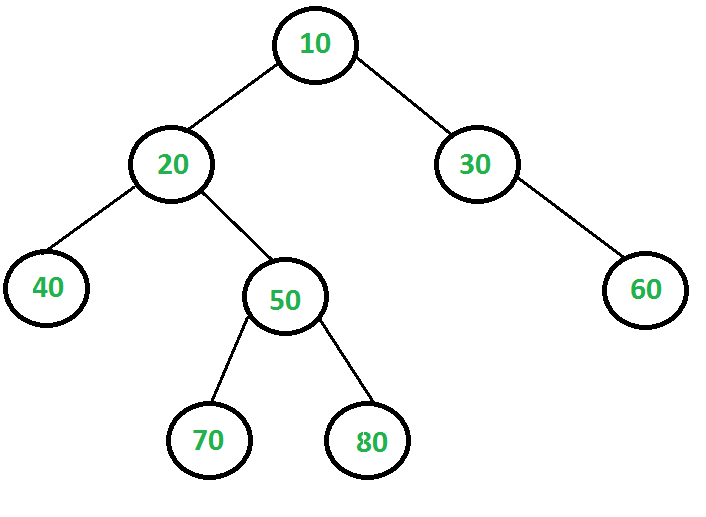

Consider the following binary tree.The LIS is
LIS: [10, 40, 60, 70, 80]

In [54]:
def LISS(root):
    # Base case: If the root is None (empty tree), the size of the LIS is 0.
    if not root:
        return 0
        
    # Recursively calculate the size of the LIS for the left and right subtrees (excluding the current node).
    ex_size = LISS(root.left) + LISS(root.right)
    
    # Consider including the current node in the LIS and recursively calculate the size of the LIS for the subtrees
    # rooted at its left and right children (excluding the grandchildren).
    inc_size = 1
    if root.right:
        inc_size += LISS(root.right.left) + LISS(root.right.right) 
    
    if root.left:
        inc_size += LISS(root.left.left) + LISS(root.left.right) 
    
    # Return the maximum size between excluding and including the current node.
    return max(ex_size, inc_size)



# The function LISS(root) finds the size of the Largest Independent Set (LIS) in a given binary tree.
# It takes the root of the binary tree as input and returns the size of the LIS.

# The logic behind the solution is as follows:
# 1. Base Case: If the root is None (empty tree), there is no independent set, so the size of the LIS is 0.
#    This serves as the base case for the recursion.

# 2. Recursion (Excluding the current node): The function recursively calculates the size of the LIS for the left
#    and right subtrees of the current node. It does this by calling the LISS function on the left and right children
#    of the current node and adding their sizes.

# 3. Recursion (Including the current node): To calculate the size of the LIS when including the current node,
#    we need to consider the current node and its grandchildren (i.e., the nodes at a distance of two edges from
#    the current node). If the current node has a right child, we consider its grandchildren by recursively calling
#    the LISS function on the left and right children of the right child. Similarly, if the current node has a left
#    child, we consider its grandchildren.

# 4. Compare Excluding and Including: Finally, we return the maximum size between the LIS calculated by excluding
#    the current node (stored in ex_size) and the LIS calculated by including the current node (stored in inc_size).
#    The maximum represents the size of the LIS for the current subtree rooted at the current node.

# By comparing the LIS sizes for all subtrees, we obtain the size of the Largest Independent Set for the entire binary tree.


# Count palindromic subsequences:

Given a string str of length N, you have to find number of palindromic subsequence (need not necessarily be distinct) present in the string str.
Note: You have to return the answer module 109+7;
 

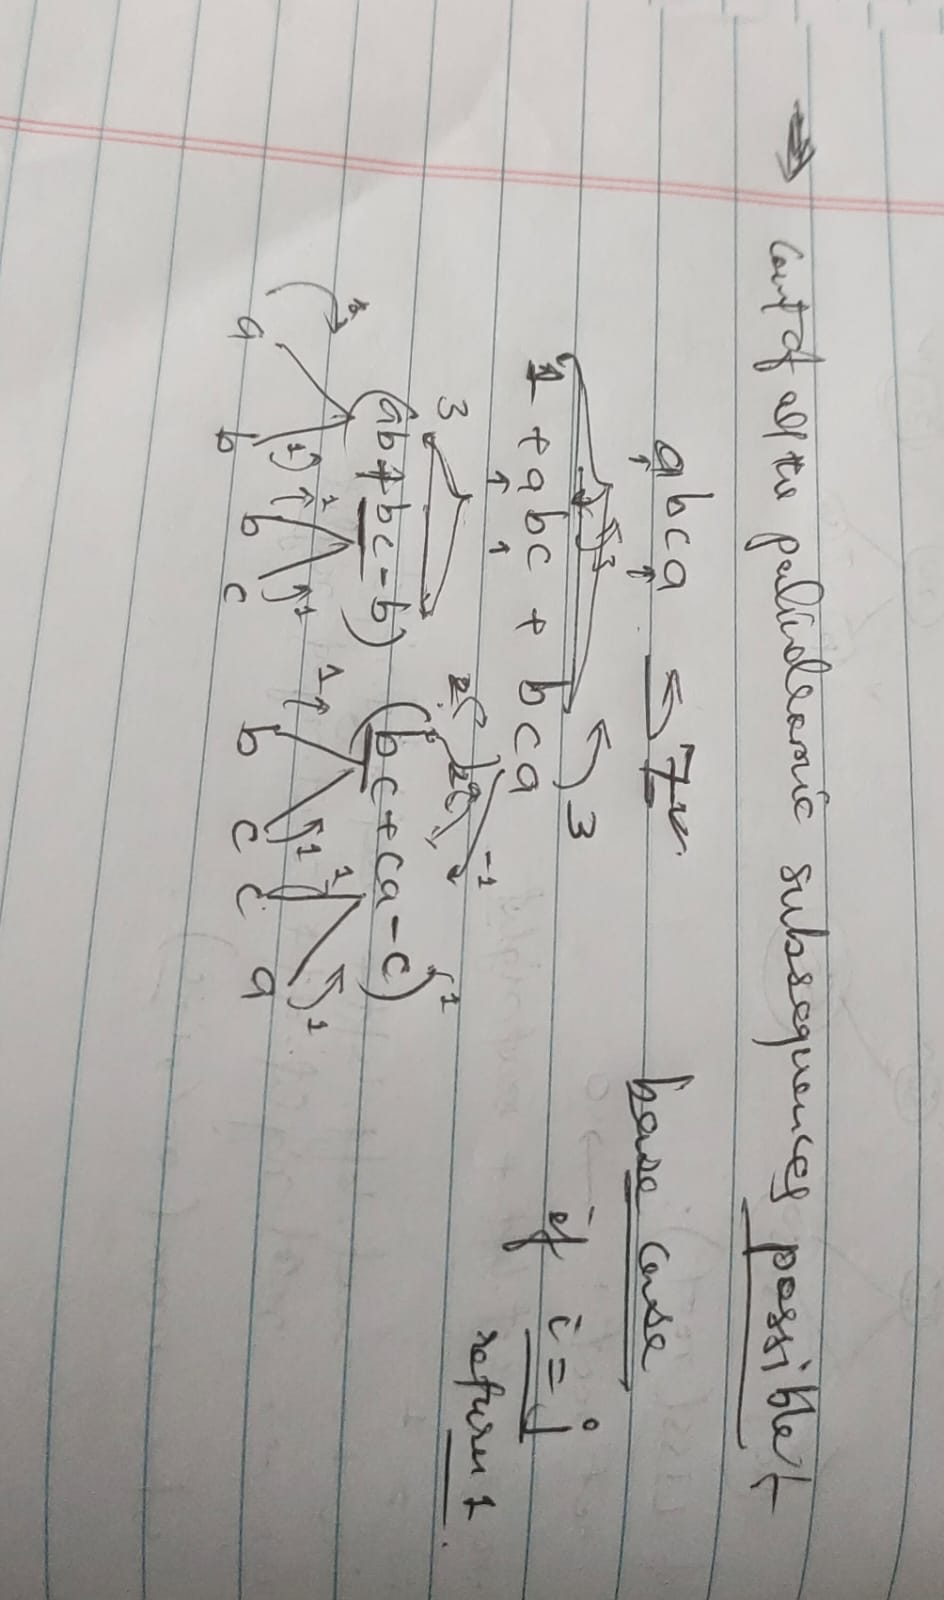

In [55]:
class Solution:
    def countPS(self, string):
        # Helper recursive function to find the number of palindromic subsequences in substring string[i:j+1].
        def subs(i, j, strg):
            # Base case: If i > j, there are no characters in the substring, so the number of palindromic
            # subsequences is 0.
            if i > j:
                return 0

            # Base case: If i == j, there is a single character in the substring, and it forms a palindromic
            # subsequence itself.
            if i == j:
                return 1

            # If the result for the current substring is already calculated, return it from the memoization table.
            if dp[i][j] != -1:
                return dp[i][j]

            # If the characters at positions i and j in the substring are the same, we have two cases to consider:
            if strg[i] == strg[j]:
                # 1. Count the palindromic subsequences in the substring excluding the first character.
                # 2. Count the palindromic subsequences in the substring excluding the last character.
                # 3. Add 1 to the count to consider the palindromic subsequence formed by characters at positions i and j.
                dp[i][j] = subs(i + 1, j, strg) + subs(i, j - 1, strg) + 1
            else:
                # If the characters at positions i and j in the substring are different, we have two cases to consider:
                # 1. Count the palindromic subsequences in the substring excluding the first character.
                # 2. Count the palindromic subsequences in the substring excluding the last character.
                # 3. Subtract the palindromic subsequences counted twice, i.e., the palindromic subsequences in the
                #    substring excluding the first and last characters.
                dp[i][j] = subs(i + 1, j, strg) + subs(i, j - 1, strg) - subs(i + 1, j - 1, strg)

            # Return the result for the current substring.
            return dp[i][j]

        n = len(string)
        MOD = 10**9 + 7

        # Initialize a memoization table 'dp' to store the results of subproblems.
        dp = [[-1] * n for i in range(n)]

        # Call the recursive helper function 'subs' to find the number of palindromic subsequences.
        ans = subs(0, n - 1, string)

        # Return the result modulo 10^9 + 7, as specified in the problem statement.
        return ans % MOD

In [56]:
class Solution:
    def countPS(self, string):
        # Helper recursive function to find the number of palindromic subsequences in substring string[i:j+1].
        def subs(i, j, strg):
            # Base case: If i > j, there are no characters in the substring, so the number of palindromic
            # subsequences is 0.
            if i > j:
                return 0

            # Base case: If i == j, there is a single character in the substring, and it forms a palindromic
            # subsequence itself.
            if i == j:
                return 1

            # If the result for the current substring is already calculated, return it from the memoization table.
            if dp[i][j] != -1:
                return dp[i][j]

            # If the characters at positions i and j in the substring are the same, we have two cases to consider:
            if strg[i] == strg[j]:
                # 1. Count the palindromic subsequences in the substring excluding the first character.
                # 2. Count the palindromic subsequences in the substring excluding the last character.
                # 3. Add 1 to the count to consider the palindromic subsequence formed by characters at positions i and j.
                dp[i][j] = subs(i + 1, j, strg) + subs(i, j - 1, strg) + 1
            else:
                # If the characters at positions i and j in the substring are different, we have two cases to consider:
                # 1. Count the palindromic subsequences in the substring excluding the first character.
                # 2. Count the palindromic subsequences in the substring excluding the last character.
                # 3. Subtract the palindromic subsequences counted twice, i.e., the palindromic subsequences in the
                #    substring excluding the first and last characters.
                dp[i][j] = subs(i + 1, j, strg) + subs(i, j - 1, strg) - subs(i + 1, j - 1, strg)

            # Return the result for the current substring.
            return dp[i][j]

        n = len(string)
        MOD = 10**9 + 7

        # Initialize a memoization table 'dp' to store the results of subproblems.
        dp = [[-1] * n for i in range(n)]

        # Call the recursive helper function 'subs' to find the number of palindromic subsequences.
        ans = subs(0, n - 1, string)

        # Return the result modulo 10^9 + 7, as specified in the problem statement.
        return ans % MOD


# Longest Palindromic Substring

Given a string S, find the longest palindromic substring in S. Substring of string S: S[ i . . . . j ] where 0 ≤ i ≤ j < len(S). Palindrome string: A string which reads the same backwards. More formally, S is palindrome if reverse(S) = S. Incase of conflict, return the substring which occurs first ( with the least starting index ).

In [57]:
class Solution:
    def longestPalindrome(self, S):
        n = len(S)
        
        max_st = ''  # Initialize a variable to store the longest palindromic substring
        
        # Iterate through all possible starting positions of substrings
        for i in range(n):
            # Iterate through all possible ending positions of substrings
            for j in range(i, n+1):
                # Check if the substring S[i:j] is a palindrome using the ispalindrome function
                if self.ispalindrome(S[i : j]):
                    # If it is a palindrome and its length is greater than the length of the current max_st,
                    # update max_st with the current palindrome.
                    if len(S[i : j]) > len(max_st):
                        max_st = S[i : j]
        
        return max_st
        
    def ispalindrome(self, st):
        # Base case: If the length of the string st is less than or equal to 1, it is a palindrome.
        if len(st) <= 1:
            return True
        
        n = len(st)
        
        # Check if the first and last characters of the string st are equal
        if st[0] == st[-1]:
            # Recur for the substring st[1 : n-1] (excluding the first and last characters)
            return self.ispalindrome(st[1 : n-1])
        
        # If the first and last characters are not equal, the string is not a palindrome
        return False


# Job scheduling Problem:

Given a set of N jobs where each jobi has a deadline and profit associated with it.

Each job takes 1 unit of time to complete and only one job can be scheduled at a time. We earn the profit associated with job if and only if the job is completed by its deadline.

Find the number of jobs done and the maximum profit.

Note: Jobs will be given in the form (Jobid, Deadline, Profit) associated with that Job.

In [58]:
class Solution:
    # Function to find the maximum profit and the number of jobs done.
    def JobScheduling(self, Jobs, n):
        # Sort the jobs in descending order based on their profits.
        Jobs.sort(key=lambda x: x.profit, reverse=True)
        
        # Initialize an array 'table' to keep track of the time slots that are already filled with jobs.
        table = [0] * n
        
        sum1 = 0  # Initialize a variable to store the maximum profit.
        count = 0  # Initialize a variable to store the number of jobs done.
        
        # Iterate through each job in the sorted order.
        for i in range(n):
            x = Jobs[i].deadline  # Get the deadline of the current job.
            
            # Find the earliest available time slot (closest to the deadline) to schedule the job.
            for j in range(x, 0, -1):
                if table[j - 1] == 0:  # If the time slot is available, schedule the job.
                    table[j - 1] = Jobs[i].deadline  # Mark the time slot as filled.
                    sum1 += Jobs[i].profit  # Update the total profit.
                    count += 1  # Increment the count of jobs done.
                    break  # Move to the next job.
        
        # Return the count of jobs done and the maximum profit.
        return (count, sum1)


# Geek and its Game of Coins
Given three numbers N, X, and Y. Geek and his friend playing a coin game. In the beginning, there are N coins. In each move, a player can pick X, Y, or 1 coin. Geek always starts the game. The player who picks the last coin wins the game. The task is to check whether Geek will win the game or not if both are playing optimally.


In [59]:
class Solution:
    def findWinner(self, N, X, Y):
        # code here
        
        # Ensure X is smaller than or equal to Y to simplify the logic.
        if X > Y:
            X, Y = Y, X
            
        # Base cases: If there is only one coin, or if N is equal to X or Y, the first player wins.
        if N == 1 or N == X or N == Y:
            return 1
        
        # Base case: If there are only two coins, the second player wins.
        elif N == 2:
            return 0
        
        # Initialize a DP array to keep track of the winning status for different number of coins (from 0 to N).
        dp = [0 for _ in range(N + 1)]
        
        # Base cases: Initialize dp[0] as False (indicating the first player loses), and dp[1] as True (indicating the first player wins).
        dp[0] = False
        dp[1] = True
        
        # To determine the winning status for each number of coins from 2 to N, use a loop.
        for i in range(2, N + 1):
            # Check if the first player can win by taking one coin.
            
            if dp[i - 1] >= 0 and dp[i - 1] == False:
                dp[i] = True
                
            # Check if the first player can win by taking X coins.
            elif i - X >= 0 and dp[i - X] >= 0 and dp[i - X] == False:
                dp[i] = True
                
            # Check if the first player can win by taking Y coins.
            elif i - Y >= 0 and dp[i - Y] >= 0 and dp[i - Y] == False:
                dp[i] = True
                
            # If the first player can't win by taking one coin, X coins, or Y coins, they will lose.
            else:
                dp[i] = False
        
        # Check if the first player wins by taking all the N coins (dp[-1]).
        if dp[-1] == False:
            return 0
        return 1


# Buy and sell a stock at most twice :

In daily share trading, a buyer buys shares in the morning and sells them on the same day. If the trader is allowed to make at most 2 transactions in a day, the second transaction can only start after the first one is complete (Buy->sell->Buy->sell). The stock prices throughout the day are represented in the form of an array of prices. 

Given an array price of size N, find out the maximum profit that a share trader could have made.

In [60]:
from typing import List

class Solution:
    def maxProfit(self, n: int, price: List[int]) -> int:
        # code here
        
        # Initialize an array 'profit' to store the maximum profit that can be achieved at each index.
        profit = [0 for _ in range(n)]
        
        # Find the maximum possible profit that can be achieved by selling the stock after the i-th day.
        max1 = price[n-1]
        
        # Iterate from the second-to-last day to the first day.
        for i in range(n-2, -1, -1):
            # Calculate the potential profit if the stock is sold on the i-th day.
            if price[i] < max1:
                profit[i] = max(max1 - price[i], profit[i+1])
            else:
                profit[i] = profit[i+1]
                
            # Update the maximum price seen so far.
            max1 = max(max1, price[i])
        
        # Find the maximum possible profit that can be achieved by buying the stock before the i-th day.
        min1 = price[0]
        
        # Iterate from the second day to the last day.
        for i in range(1, n):
            # Calculate the potential profit if the stock is bought on the i-th day.
            if price[i] > min1:
                profit[i] = max(price[i] - min1 + profit[i], profit[i], profit[i-1])
            else:
                profit[i] = max(profit[i-1], profit[i])
            
            # Update the minimum price seen so far.
            min1 = min(min1, price[i])
        
        # The maximum profit is the maximum value in the 'profit' array.
        return profit[-1]


# Optimal Strategy For A Game
You are given an array A of size N. The array contains integers and is of even length. The elements of the array represent N coin of values V1, V2, ....Vn. You play against an opponent in an alternating way.

In each turn, a player selects either the first or last coin from the row, removes it from the row permanently, and receives the value of the coin.

You need to determine the maximum possible amount of money you can win if you go first.
Note: Both the players are playing optimally.

In [61]:
class Solution:
    dp = None
    
    def optimalStrategyOfGame(self, arr, n):
        # code here
        
        global dp
        
        # Initialize a 2D DP array 'dp' to store the optimal solution for different subproblems.
        dp = [[-1 for _ in range(n)] for _ in range(n)]
        
        if n < 0:
            return 0
        
        elif n == 1:
            return arr[0]
        
        # Call the recursive function 'solve' to find the maximum possible amount of money to win if you go first.
        ans = self.solve(0, n-1, arr)

        return ans

    def solve(self, i, j, arr):
        global dp
        
        # If the current subproblem has invalid indices (i > j), return 0 as there are no coins to pick.
        if i > j:
            return 0
        
        # If the solution for the subproblem (i, j) is already calculated, return it from 'dp'.
        if dp[i][j] != -1:
            return dp[i][j]
        
        # If you pick the first element, the opponent will leave you a minimum possible answer (from first and last)
        # as the opponent is playing optimally to maximize their profit.
        x = arr[i] + min(self.solve(i+2, j, arr), self.solve(i+1, j-1, arr))
        
        # If you pick the last element, the opponent will leave you a minimum possible answer (from first and last)
        # as the opponent is playing optimally to maximize their profit.
        y = arr[j] + min(self.solve(i+1, j-1, arr), self.solve(i, j-2, arr))
        
        # Choose the maximum amount you can win either by picking the first element or the last element.
        dp[i][j] = max(x, y)
        
        return dp[i][j]


# Mobile Numeric Keypad
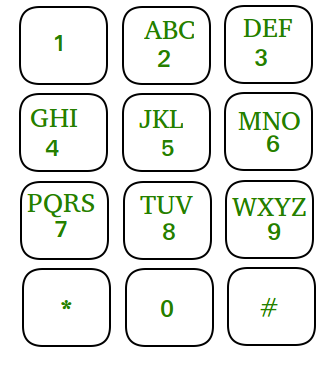

In [62]:
class Solution:
    dp = None  # A class variable to store the memoization table

    def getCount(self, N):
        # code here
        global dp
        n = N

        dp = [[-1 for _ in range(n+1)] for _ in range(10)]  # Initialize the memoization table
        
        base = [[1, 2, 3], [4, 5, 6], [7, 8, 9], [-1, 0, -1]]  # Mobile numeric keypad layout

        if n == 0:
            return 0

        if n == 1:
            return 10

        ans = 0

        # Step 1: Iterate through all keys on the mobile numeric keypad
        for i in range(4):
            for j in range(3):
                if base[i][j] != -1:  # Skip bottom row corner buttons (* and #)

                    # Step 2: Call the recursive solve function to calculate count
                    ans += self.solve(i, j, base, n)

        return ans

    def solve(self, i, j, base, n):
        global dp

        # Step 3: Base case: If n is 1, there is only one valid number of length 1
        if n == 1:
            return 1

        # Step 4: If the result is already memoized, return it
        if dp[base[i][j]][n] != -1:
            return dp[base[i][j]][n]

        else:
            a1 = self.solve(i, j, base, n-1)  # Step 5: Calculate the count for n-1 length valid numbers

            a, b, c, d = 0, 0, 0, 0

            # Step 6: Calculate counts for valid numbers by moving to adjacent keys
            if j - 1 >= 0 and base[i][j - 1] != -1:
                a = self.solve(i, j - 1, base, n-1)

            if j + 1 < 3 and base[i][j + 1] != -1:
                b = self.solve(i, j + 1, base, n-1)

            if i - 1 >= 0 and base[i - 1][j] != -1:
                c = self.solve(i - 1, j, base, n-1)

            if i + 1 < 4 and base[i + 1][j] != -1:
                d = self.solve(i + 1, j, base, n-1)

            # Step 7: Store the calculated count in the memoization table and return it
            dp[base[i][j]][n] = a1 + a + b + c + d
            return dp[base[i][j]][n]


In [63]:
%%time 
x = [1, 3, 1, 55, 6]
if 16 not in x:
    print('yes, we can use in or not in for lists as well')

if 55 in x:
    print('yes, we can use in or not in for lists as well')

yes, we can use in or not in for lists as well
yes, we can use in or not in for lists as well
Wall time: 0 ns


# Maximum Rectangular Area in a Histogram
Find the largest rectangular area possible in a given histogram where the largest rectangle can be made of a number of contiguous bars. For simplicity, assume that all bars have the same width and the width is 1 unit, there will be N bars height of each bar will be given by the array arr.
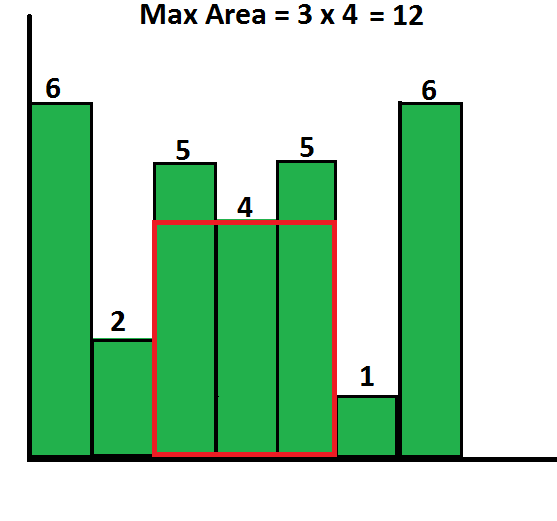

In [64]:
class Solution:
    # Function to find largest rectangular area possible in a given histogram.
    def getMaxArea(self, histogram):
        # Initialize an empty stack to store indices of bars in the histogram.
        stack = [0]

        # Append a 0 at the end of the histogram to ensure all elements are processed.
        histogram.append(0)

        # Initialize a variable to store the maximum rectangular area found.
        ans = 0

        # Get the total number of elements in the histogram.
        n = len(histogram)

        # Iterate through each bar in the histogram from left to right.
        for i in range(1, n):
            # While the stack is not empty and the current bar's height is less than
            # or equal to the height of the bar at the top of the stack, it means we have
            # found the right boundary of a potential rectangle.
            while stack and histogram[stack[-1]] >= histogram[i]:
                # Pop elements from the stack until the current bar's height is greater
                # than the height of the bar at the top of the stack. This ensures that we
                # find the left boundary of the potential rectangle.
                left_idx = stack.pop()

                # The height of the rectangle is the height of the bar at the top of the stack.
                height = histogram[left_idx]

                # The width of the rectangle is the difference between the current index 'i'
                # and the index of the bar at the top of the stack.
                width = i - stack[-1] - 1 if stack else i

                # Calculate the area of the potential rectangle.
                area = height * width

                # Update 'ans' to store the maximum area found so far.
                ans = max(ans, area)

            # After processing the current bar, add its index to the stack for future computations.
            stack.append(i)

        # Return the maximum rectangular area found.
        return ans


# Max rectangle
Given a binary matrix M of size n X m. Find the maximum area of a rectangle formed only of 1s in the given matrix.

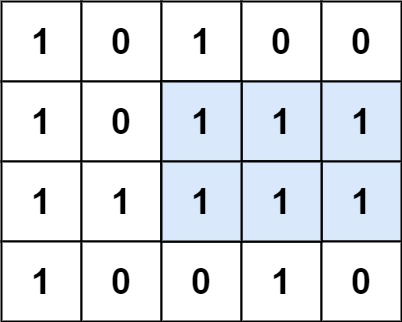

In [65]:
class Solution:
    def maxArea(self, M, n, m):
        # Function to find the maximum rectangular area in a binary matrix.
        # The function takes the binary matrix 'M', number of rows 'n', and
        # number of columns 'm' as input.
        
        # Initialize the number of rows and columns.
        n = n  # no of rows
        m = m  # no of columns
        
        # If the matrix has only one element and it is 1, return 1 as the maximum area.
        if n == 1 and m == 1 and M[0][0] == 1:
            return 1

        # If the matrix has only one element and it is 0, return 0 as the maximum area.
        elif n == 1 and m == 1 and M[0][0] == 0:
            return 0

        # For each row in the binary matrix, starting from the second row (index 1):
        for i in range(1, n):
            for j in range(m):
                # If the current cell is 0, continue to the next cell.
                if M[i][j] == 0:
                    continue
                # If the current cell is 1, update the value in the matrix
                # to represent the height of the histogram at that position.
                # The height is the count of consecutive 1's above the current cell.
                elif M[i][j] == 1:
                    M[i][j] = M[i-1][j] + 1

        # Initialize a variable to store the maximum area found so far.
        ans = 0

        # For each row in the binary matrix:
        for i in range(n):
            # Find the maximum rectangular area in the histogram of the current row.
            # Call the 'histogram_area' function to calculate the maximum area.
            max_area_in_row = self.histogram_area(M[i])

            # Update the maximum area found across all rows.
            ans = max(ans, max_area_in_row)

        # Return the maximum area found across all rows, which represents
        # the maximum rectangular area in the binary matrix.
        return ans

    def histogram_area(self, histogram):
        # Function to find the maximum rectangular area in a histogram.
        # The function takes the histogram (a list of integers representing heights of bars) as input.
        
        # Append a 0 at the end of the histogram to ensure all elements are processed.
        histogram.append(0)

        # Initialize a stack to store indices of bars in the histogram.
        stack = [0]

        # Get the total number of elements in the histogram.
        n = len(histogram)

        # Initialize a variable to store the maximum area found.
        ans = 0

        # Iterate through each bar (height) in the histogram:
        for i in range(1, n):
            # While the stack is not empty and the current bar's height is less than
            # or equal to the height of the bar at the top of the stack, it means we have
            # found the right boundary of a potential rectangle.
            while stack and histogram[stack[-1]] >= histogram[i]:
                # Pop elements from the stack until the current bar's height is greater
                # than the height of the bar at the top of the stack. This ensures that we
                # find the left boundary of the potential rectangle.
                left_idx = stack.pop()

                # The height of the rectangle is the height of the bar at the top of the stack.
                height = histogram[left_idx]

                # The width of the rectangle is the difference between the current index 'i'
                # and the index of the bar at the top of the stack.
                width = i - stack[-1] - 1 if stack else i

                # Calculate the area of the potential rectangle.
                area = height * width

                # Update 'ans' to store the maximum area found so far.
                ans = max(ans, area)

            # After processing the current bar, add its index to the stack for future computations.
            stack.append(i)

        # Return the maximum area found in the histogram.
        return ans


# Maximum sum Rectangle
Given a 2D matrix M of dimensions RxC. Find the maximum sum submatrix in it.

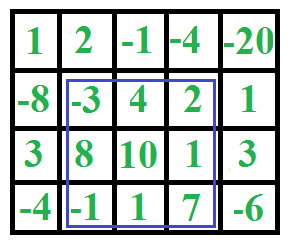

In [66]:
class Solution:
    def maximumSumRectangle(self, R, C, M):
        # Function to find the maximum sum rectangle in the given 2D matrix.

        ans = -9999999999  # Initialize a variable to store the maximum sum found so far.

        # Step 1: Iterate through each row of the matrix.
        for i in range(R):
            histogram = M[i]  # Treat the current row 'M[i]' as a histogram.
            ans1 = 0  # Initialize 'ans1' to handle all-negative row values.

            # Step 4: Apply Kadane's algorithm to find the maximum sum subarray (maximum sum in the row).
            # Keep track of the maximum sum found so far in 'ans1'.
            for j in range(C):
                ans1 = max(ans1 + histogram[j], histogram[j])
                ans = max(ans, ans1)  # Step 6: Update 'ans' to store the maximum sum found across all rows.

            # Step 7: Consider all possible pairs of rows 'i' and 'j' (where 'j' is greater than 'i').
            # Step 8: Create a new array 'histogram' to store the sum of elements between rows 'i' and 'j' for each column.
            for j in range(i + 1, R):
                for k in range(C):
                    histogram[k] += M[j][k]  # Efficiently compute the sum of elements between rows 'i' and 'j'.

                curr = histogram[0]  # Initialize variables for Kadane's algorithm.
                max_val = histogram[0]

                # Step 9: Apply Kadane's algorithm to find the maximum sum subarray in the 'histogram' array.
                # Step 10: Update 'ans' again to store the maximum sum rectangle found so far among all rectangles considered.
                for x in range(1, C):
                    curr = max(curr + histogram[x], histogram[x])
                    max_val = max(max_val, curr)
                ans = max(ans, max_val)

        # Step 11: After iterating through all possible pairs of rows and columns,
        # the maximum sum rectangle found in this way will be the answer to the problem.
        return ans  # Step 12: Return the maximum sum rectangle found in the given 2D matrix.


# max profit by Buying and selling an stock at most K times

In the stock market, a person buys a stock and sells it on some future date. Given the stock prices of N days in an array A[ ] and a positive integer K, find out the maximum profit a person can make in at-most K transactions. A transaction is equivalent to (buying + selling) of a stock and new transaction can start only when the previous transaction has been completed.



In [67]:
#TLE Approach 
class Solution:
    def maxProfit(self, K, N, A):
        # K: The maximum number of transactions allowed
        # N: The number of days or total number of stock prices
        # A: A list containing stock prices for each day
        
        # Create a 2D array `dp` to store the maximum profit at each day with different numbers of transactions (0 to K).
        dp = [[0 for _ in range(N)] for _ in range(K+1)]
        
        # Initialize the first row (i.e., 0 transactions) as 0 since there will be no profit without any transactions.
        for i in range(K):
            dp[i][0] = 0
        
        # Loop through each transaction count (i) from 1 to K.
        for i in range(1, K+1):
            # Loop through each day (j) from 1 to N.
            for j in range(1, N):
                # Loop through each day (m) from 0 to (j-1).
                # The inner loop finds the maximum profit by considering different buying and selling points.
                for m in range(j):
                    # Calculate the current day's maximum profit by taking the maximum between the following three values:
                    # 1. The maximum profit achieved on the previous day (dp[i][j-1]).
                    # 2. The maximum profit achieved by not performing any transaction on the current day (dp[i][j]).
                    # 3. The maximum profit achieved by selling on the current day (A[j] - A[m] + dp[i-1][m]).
                    #    Here, A[j] - A[m] represents the profit obtained by selling on the current day
                    #    (selling at A[j]) after buying on day m (buying at A[m]).
                    #    dp[i-1][m] represents the maximum profit achieved with (i-1) transactions until day m.
                    dp[i][j] = max(dp[i][j-1], dp[i][j], A[j] - A[m] + dp[i-1][m])
            
        # The maximum profit will be in the last element of the last row (i.e., dp[-1][-1]).
        return dp[-1][-1]


In [68]:
# optimized approach
class Solution:
    def maxProfit(self, K, N, A):
        # K: The maximum number of transactions allowed
        # N: The number of days or total number of stock prices
        # A: A list containing stock prices for each day
        
        # Create a 2D array `dp` to store the maximum profit at each day with different numbers of transactions (0 to K).
        dp = [[0 for _ in range(N)] for _ in range(K+1)]
        
        # Initialize the first row (i.e., 0 transactions) as 0 since there will be no profit without any transactions.
        for i in range(K):
            dp[i][0] = 0
        
        # Loop through each transaction count (i) from 1 to K.
        for i in range(1, K+1):
            
            # Initialize a variable `max_diff` to keep track of the maximum difference between the previous
            # (i-1) transaction's profit and the current stock price (A[j]) for each day (j).
            max_diff = dp[i-1][0] - A[0]
            
            # Loop through each day (j) from 1 to N.
            for j in range(1, N):
                
                # Update `max_diff` to be the maximum of the previous (i-1) transaction's profit and the difference
                # between the previous day's profit (dp[i-1][j]) and the current day's stock price (A[j]).
                max_diff = max(max_diff, dp[i-1][j] - A[j])
                    
                # Calculate the maximum profit for the current day and current transaction count (i) by taking the maximum
                # between the previous day's profit (dp[i][j-1]) and the sum of the current day's stock price (A[j]) and `max_diff`.
                dp[i][j] = max(dp[i][j-1], A[j] + max_diff)
            
        # The maximum profit will be in the last element of the last row (i.e., dp[-1][-1]).
        return dp[-1][-1]


# Interleaved Strings


Given strings A, B, and C, find whether C is formed by an interleaving of A and B.

An interleaving of two strings S and T is a configuration such that it creates a new string Y from the concatenation substrings of A and B and |Y| = |A + B| = |C|

For example:

A = "XYZ"

B = "ABC"

so we can make multiple interleaving string Y like, XYZABC, XAYBCZ, AXBYZC, XYAZBC and many more so here your task is to check whether you can create a string Y which can be equal to C.

Specifically, you just need to create substrings of string A and create substrings B and concatenate them and check whether it is equal to C or not.

Note: a + b is the concatenation of strings a and b.

Return true if C is formed by an interleaving of A and B, else return false.

In [69]:

class Solution:
    #function should return True/False

    def isInterleave(self, A, B, C):

        m, n = len(A), len(B)
    
        # Base case: If the lengths of A and B don't add up to the length of C, it's not possible to form C by interleaving A and B.
        if m + n != len(C):
            return False
    
        # Create a 2D DP table to store the results of subproblems. dp[i][j] will be True if C[:i+j] is formed by interleaving A[:i] and B[:j].
        dp = [[False for _ in range(n + 1)] for _ in range(m + 1)]
    
        # Fill the DP table using bottom-up approach.
        for i in range(m + 1):
            for j in range(n + 1):
                # Base case: An empty string can be formed by interleaving two empty strings.
                if i == 0 and j == 0:
                    dp[i][j] = True
                # Check if C[:i+j] is formed by interleaving A[:i] and B[:j] by considering two cases:
                # 1. If the current character of C matches the corresponding character in A and the substring A[:i-1] can form the previous part of C.
                # 2. If the current character of C matches the corresponding character in B and the substring B[:j-1] can form the previous part of C.
                elif i > 0 and A[i - 1] == C[i + j - 1] and dp[i - 1][j]:
                    dp[i][j] = True
                elif j > 0 and B[j - 1] == C[i + j - 1] and dp[i][j - 1]:
                    dp[i][j] = True
    
        # The result will be stored in dp[m][n], which indicates whether C can be formed by interleaving A and B.
        return dp[m][n]


# --------------Solved By - Suraj------------------